# FYP - Heart Disease Predictor

## Initial Stage: Library Import & Data Import

### Library Import

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import re
import pickle

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Encoding
from sklearn.preprocessing import LabelEncoder

# Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Model Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

# Models 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import tensorflow
import keras_tuner as kt

### Data Import and Initial Viewing

In [2]:
# Installing the initial Data, and both surveys results (Indonesia and English ver)
data = pd.read_csv("heart_2020_final.csv")
surveyIna = pd.read_csv("Survey Bahasa Indonesia Version.csv")
surveyEng = pd.read_csv("Survey English Language Version.csv")

In [3]:
#initial viewing of the Dataset
data.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#initial viewing of the Indonesia Version Survey
surveyIna.head()

Timestamp                    Username  \
0  2023/03/09 2:36:45 PM GMT+8      helenavian17@gmail.com   
1  2023/03/09 2:36:51 PM GMT+8   vaniaaurelia094@gmail.com   
2  2023/03/09 2:47:51 PM GMT+8  marion.florentia@gmail.com   
3  2023/03/09 2:52:15 PM GMT+8     nathanwork976@gmail.com   
4  2023/03/09 3:02:32 PM GMT+8      bryanongko29@gmail.com   

  Peserta bersedia mengikuti Survei ini dengan sukarela Jenis Kelamin Peserta  \
0                                                 Ya                   Wanita   
1                                                 Ya                   Wanita   
2                                                 Ya                   Wanita   
3                                                 Ya                     Pria   
4                                                 Ya                     Pria   

  Jarak Usia Peserta Pekerjaan Peserta  \
0            20 - 24             Murid   
1            20 - 24             Murid   
2            20 - 24             Murid   
3     19 dan kebawah             Murid   
4            20 - 24             Murid   

   1. Seberapa dalam pengetahuan anda mengenai penyakit jantung?  \
0                                                  3               
1                                                  2               
2                                                  5               
3                                                  3               
4                                                  3               

  2. Dari Perspektif anda, apa faktor utama yang bisa menyebabkan penyakit jantung?  \
0  Merokok;Berat badan berlebih (kegemukan);Konsu...                                  
1  Merokok;Konsumsi Alkohol berlebih;Kurang berol...                                  
2  Genetika/Keturunan;Cacat Lahir;Berat badan ber...                                  
3  Genetika/Keturunan;Merokok;Konsumsi Alkohol be...                                  
4  Merokok;Berat badan berlebih (kegemukan);Konsu...                                  

  3. Berdasarkan pengetahuan anda, jarak umur berapa yang lebih mudah untuk terkena penyakit jantung yang disebabkan oleh pola hidup?  \
0                      51 - 60;61 - 70;71 dan keatas                                                                                    
1                                            31 - 40                                                                                    
2                                    41 - 50;51 - 60                                                                                    
3                            31 - 40;41 - 50;51 - 60                                                                                    
4              41 - 50;51 - 60;61 - 70;71 dan keatas                                                                                    

  4. Apakah menurutmu pemeriksaan kesehatan itu penting?  ...  \
0                                                 Ya      ...   
1                                                 Ya      ...   
2                                                 Ya      ...   
3                                                 Ya      ...   
4                                                 Ya      ...   

  8. Apakah anda memiliki kesusahan berjalan atau naik tangga?  \
0                                              Tidak             
1                                              Tidak             
2                                              Tidak             
3                                              Tidak             
4                                              Tidak             

  9. Apa ras anda? 10. Apakah anda pernah/sedang menderita dari diabetes?  \
0             Asia                                              Tidak       
1             Asia                                              Tidak       
2             Asia                                              Tidak       
3             Asia                                       

In [6]:
#initial viewing of the Indonesia Version Survey
surveyEng.head()

Timestamp                     Username  \
0  2023/03/09 2:35:32 PM GMT+8   aloysius.brandon@gmail.com   
1  2023/03/09 2:42:08 PM GMT+8          jocelyenn@gmail.com   
2  2023/03/09 2:45:29 PM GMT+8  clarence.ramli.cr@gmail.com   
3  2023/03/09 2:45:59 PM GMT+8     tp061236@mail.apu.edu.my   
4  2023/03/09 3:00:10 PM GMT+8    shellaangelia23@gmail.com   

  The Participant is willingly participating in this questionnaire  \
0                                                Yes                 
1                                                Yes                 
2                                                Yes                 
3                                                Yes                 
4                                                Yes                 

  Participant Gender Participant Age Group Participant Occupation  \
0               Male               20 - 24                Student   
1             Female               20 - 24                Student   
2               Male               25 - 29               Employed   
3               Male               20 - 24                Student   
4             Female               20 - 24               Employed   

   1. How deep is your understanding of Heart Disease?  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  4     
4                                                  3     

  2.  From your perspective, what is the main factor(s) that can cause heart disease?  \
0  Genetics/Hereditary;Smoking;Overweight;High Bl...                                    
1  Genetics/Hereditary;Smoking;Excessive Alcohol ...                                    
2  Genetics/Hereditary;Lack of Exercise;Unhealthy...                                    
3  Genetics/Hereditary;Birth Defects;Overweight;L...                                    
4  Genetics/Hereditary;Overweight;Lack of Exercis...                                    

  3. Based on your knowledge, what age group is the more likely to suffer from a lifestyle-caused Heart Disease?  \
0                                            51 - 60                                                               
1                                            61 - 70                                                               
2               41 - 50;51 - 60;61 - 70;71 and Above                                                               
3       31 - 40;41 - 50;51 - 60;61 - 70;71 and Above                                                               
4                                    51 - 60;61 - 70                                                               

  4. Do you think a medical check up is important?  ...  \
0                                              Yes  ...   
1                                              Yes  ...   
2                                              Yes  ...   
3                                              Yes  ...   
4                                              Yes  ...   

  8. Do you have difficulty walking or climbing stairs?  \
0                                                 No      
1                                                 No      
2                                                 No      
3                                                 No      
4                                                 No      

  9. What is your race/ethnicity?  \
0                           Asian   
1                           Asian   
2                           Asian   
3                           Asian   
4                           Asian   

  10.  Have you ever had/are you currently suffering from diabetes?  \
0                                                 No                  
1                                                 No                  
2                                                 No                  
3       

##### Conclusion:
##### 1. Need to remove the unused data from the surveys
##### 2. There are missing data on main data
##### 3. Need to merge the all dataset into one
##### 4. The format for both surveys are the same, thus same pre-processing steps can be done

## Stage 1: Pre-Processing of the Survey Data

### 1.1 Remove the Unused data

##### Need to remove the unneeded data from the dataframe, to allow data merging

#### 1.1.1 Data Removal

##### Dropping any Unecessary data

In [7]:
# Dropping the unnecessary data
surveyIna.drop(surveyIna.columns[[0, 1, 2, 5]], axis=1, inplace=True)
surveyEng.drop(surveyEng.columns[[0, 1, 2, 5]], axis=1, inplace=True)

In [8]:
# Dropping the Survey Questions Part
surveyIna.drop(surveyIna.iloc[:, 2:12], inplace=True, axis=1)
surveyEng.drop(surveyEng.iloc[:, 2:12], inplace=True, axis=1)

#### 1.1.2 Results Checking

In [9]:
surveyIna.head()

Jenis Kelamin Peserta Jarak Usia Peserta 1. Berapa berat badan anda?  \
0                Wanita            20 - 24                        55kg   
1                Wanita            20 - 24                        45kg   
2                Wanita            20 - 24                       55 kg   
3                  Pria     19 dan kebawah                       75 kg   
4                  Pria            20 - 24                       82 kg   

  2. Berapa tinggi badan anda?  \
0                        170cm   
1                        160cm   
2                       162 cm   
3                       170 cm   
4                       174 cm   

  3. Apakah anda pernah merokok 100 batang rokok dalam seumur hidup anda?  \
0                                              Tidak                        
1                                              Tidak                        
2                                              Tidak                        
3                                              Tidak                        
4                                              Tidak                        

  4. Apakah anda pernah/apakah anda sedang menganggap anda sebagai peminum berat (Pria dewasa meminum lebih dari 14 gelas dalam satu minggu, Wanita dewasa meminum lebih dari 7 gelas dalam seminggu)  \
0                                              Tidak                                                                                                                                                    
1                                              Tidak                                                                                                                                                    
2                                              Tidak                                                                                                                                                    
3                                              Tidak                                                                                                                                                    
4                                              Tidak                                                                                                                                                    

  5. Apakah anda pernah menderita stroke?  \
0                                   Tidak   
1                                   Tidak   
2                                   Tidak   
3                                   Tidak   
4                                   Tidak   

  6. Dalam 1 bulan, berapa hari anda mengalami penyakit fisik? (Minimal 0 Maksimal 30)  \
0                                                  0                                     
1                                             0 hari                                     
2                                     Sakit 2/3 hari                                     
3                                                  5                                     
4                                                  3                                     

  7. Dalam 1 bulan, berapa hari anda mengalami kesehatan mental yang buruk? (Minimal 0 Maksimal 30)  \
0                                                  2                                                  
1  terkadang saat sedang banyak pikiran tugas pek...                                                  
2                                                 15                                                  
3                                                 15                                                  
4                                                  0                                                  

  8. Apakah anda memiliki kesusahan berjalan atau naik tangga?  \
0                                              Tidak             
1                                              Tidak             
2                                              Tidak 

In [10]:
surveyEng.head()

Participant Gender Participant Age Group 1. What is your weight?  \
0               Male               20 - 24                 91.2 kg   
1             Female               20 - 24                   51 kg   
2               Male               25 - 29                    70KG   
3               Male               20 - 24                    60kg   
4             Female               20 - 24                   41 kg   

  2. What is your height?  \
0                  170 cm   
1                  159 cm   
2                5.5 feet   
3                   1.68m   
4                 1,51 m    

  3. Have you ever smoked 100 Cigarettes in your entire life?  \
0                                                 No            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  4.  Have you consider/Do you consider yourself a heavy drinker? (Adult Men having more than 14 drinks per week, Adult Women having more than 7 Drinks per week)  \
0                                                 No                                                                                                                
1                                                 No                                                                                                                
2                                                 No                                                                                                                
3                                                 No                                                                                                                
4                                                Yes                                                                                                                

  5. Have you ever suffered from a stroke?  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  6. How many days during the past 30 days you are experiencing physical illness/injury? (Minimum 0 Maximum 30)  \
0                                                  0                                                              
1                                                  2                                                              
2                                                  2                                                              
3                                                  4                                                              
4                                                  0                                                              

  7. How many days during the past 30 days you are experiencing bad mental health? (Minimum 0 Maximum 30)  \
0                                                  7                                                        
1                                                  1                                                        
2                                                  1                                                        
3                                                  0                                                        
4                                                  2                                                        

  8. Do you have difficulty walking or climbing stairs?  \
0                                                 No      
1                                                 No      
2                                                 No      
3                                                 No      
4                                                 No      

  9. What is your race/ethnicity?  \
0        

##### Remove any Duplicates on both survey datas

In [11]:
surveyEng.drop_duplicates(inplace=True)
surveyIna.drop_duplicates(inplace=True)

In [12]:
surveyIna.shape

(51, 19)

In [13]:
surveyEng.shape

(47, 19)

In [14]:
data.shape

(319795, 18)

##### Conclusion:
##### 1. The survey dataframes are already matched in terms of attribute amount
##### 2. With the calculation of BMI (Kg/m2), the survey dataframes will only have 18 Attributes

### 1.2 Data Standarization

##### Before survey answers are merged into the main data, few steps need to be taken:
##### 1. Change the attributes name
##### 2. Translate the Indonesian version into English
##### 3. Merge the both version
##### 4. Standardize any non-standard answers, following the main data format
##### 5. Rearrange the merged dataframe to follow the Main Data's Arrangements

#### 1.2.1 Attribute Renaming

In [15]:
surveyEng.columns

Index(['Participant Gender', 'Participant Age Group',
       '1. What is your weight?', '2. What is your height?',
       '3. Have you ever smoked 100 Cigarettes in your entire life?',
       '4.  Have you consider/Do you consider yourself a heavy drinker? (Adult Men having more than 14 drinks per week, Adult Women having more than 7 Drinks per week)',
       '5. Have you ever suffered from a stroke?',
       '6. How many days during the past 30 days you are experiencing physical illness/injury? (Minimum 0 Maximum 30)',
       '7. How many days during the past 30 days you are experiencing bad mental health? (Minimum 0 Maximum 30)',
       '8. Do you have difficulty walking or climbing stairs?',
       '9. What is your race/ethnicity?',
       '10.  Have you ever had/are you currently suffering from diabetes?',
       '11. Are you physically active? (This is mentioning outside daily activities, so like exercising/doing sports)',
       '12. How would you consider your current General He

##### Following the above attribute order, the new attribute must follow the above order to be fitted into both surveys

In [16]:
# Creating the Attributes name mapping following the main data attributes' name
newAttributeName = ['Sex', 'AgeCategory', 'BodyWeight', 'BodyHeight',
                    'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
                    'MentalHealth', 'DiffWalking', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
                    'KidneyDisease', 'SkinCancer', 'HeartDisease']

# Creating a map dictionary to connect the old names to the new names
attributeMappingIna = {oldName: newName for oldName, newName in zip(surveyIna.columns, newAttributeName)}
attributeMappingEng = {oldName: newName for oldName, newName in zip(surveyEng.columns, newAttributeName)}

# Rename the columns for both surveyIna and surveyEng dataframe
surveyIna.rename(columns=attributeMappingIna, inplace=True)
surveyEng.rename(columns=attributeMappingEng, inplace=True)

##### Result Checking

In [17]:
surveyIna.head()

Sex     AgeCategory BodyWeight BodyHeight Smoking AlcoholDrinking  \
0  Wanita         20 - 24       55kg      170cm   Tidak           Tidak   
1  Wanita         20 - 24       45kg      160cm   Tidak           Tidak   
2  Wanita         20 - 24      55 kg     162 cm   Tidak           Tidak   
3    Pria  19 dan kebawah      75 kg     170 cm   Tidak           Tidak   
4    Pria         20 - 24      82 kg     174 cm   Tidak           Tidak   

  Stroke  PhysicalHealth                                       MentalHealth  \
0  Tidak               0                                                  2   
1  Tidak          0 hari  terkadang saat sedang banyak pikiran tugas pek...   
2  Tidak  Sakit 2/3 hari                                                 15   
3  Tidak               5                                                 15   
4  Tidak               3                                                  0   

  DiffWalking  Race Diabetic PhysicalActivity GenHealth SleepTime Asthma  \
0       Tidak  Asia    Tidak            Tidak    Normal         5  Tidak   
1       Tidak  Asia    Tidak            Tidak      Baik       5-7  Tidak   
2       Tidak  Asia    Tidak            Tidak      Baik         6  Tidak   
3       Tidak  Asia    Tidak               Ya      Baik         5  Tidak   
4       Tidak  Asia    Tidak               Ya      Baik       6-7  Tidak   

  KidneyDisease SkinCancer HeartDisease  
0         Tidak      Tidak        Tidak  
1         Tidak      Tidak        Tidak  
2         Tidak      Tidak        Tidak  
3         Tidak      Tidak        Tidak  
4         Tidak      Tidak        Tidak

In [18]:
surveyEng.head()

Sex AgeCategory BodyWeight BodyHeight Smoking AlcoholDrinking Stroke  \
0    Male     20 - 24    91.2 kg     170 cm      No              No     No   
1  Female     20 - 24      51 kg     159 cm      No              No     No   
2    Male     25 - 29       70KG   5.5 feet      No              No     No   
3    Male     20 - 24       60kg      1.68m      No              No     No   
4  Female     20 - 24      41 kg    1,51 m       No             Yes     No   

  PhysicalHealth MentalHealth DiffWalking   Race Diabetic PhysicalActivity  \
0              0            7          No  Asian       No              Yes   
1              2            1          No  Asian       No              Yes   
2              2            1          No  Asian       No              Yes   
3              4            0          No  Asian       No              Yes   
4              0            2          No  Asian       No              Yes   

  GenHealth  SleepTime Asthma KidneyDisease SkinCancer HeartDisease  
0      Good        6-7     No            No         No           No  
1      Good  5-6 hours     No            No         No           No  
2      Good          7     No            No         No           No  
3      Good          6     No            No         No           No  
4      Good          7     No            No         No           No

#### 1.2.2 Language Translation

##### For the language Translation process, the main objective is only to translate the Categorical/Boolean data
##### For pre-processing such as removing measuring unit, it will be handled later after the survey dataframe merging
##### For filling up missing data, it will be handled later after the survey data has been merged into the main dataframe

In [19]:
# Check all the unique values for each columns in surveyIna
for column in surveyIna.columns:
    unique_values = surveyIna[column].unique()
    print(f"Unique values in column '{column}':")
    count_nan = surveyIna[column].isna().sum()  # Count the number of NaN values
    print(f"NaN: {count_nan}")
    for value in unique_values:
        if pd.notna(value):  # Exclude NaN values from individual value counts
            count = surveyIna[column].value_counts().get(value, 0)  # Get value count, default to 0 if value not found
            print(f"{value}: {count}")
    print()

Unique values in column 'Sex':
NaN: 0
Wanita: 16
Pria: 35

Unique values in column 'AgeCategory':
NaN: 0
20 - 24: 19
19 dan kebawah: 1
55 - 59: 4
45 - 49: 11
50 - 54: 2
40 - 44: 7
35 - 39: 5
30 - 34: 2

Unique values in column 'BodyWeight':
NaN: 2
55kg: 2
45kg: 1
55 kg: 1
75 kg: 1
82 kg: 1
40 kg: 1
44kg: 1
80Kg : 1
65kg: 1
64: 1
78 kg: 1
57 kg : 1
60: 2
79kg: 1
89 kg: 1
42 kg: 1
95 kg: 1
53kg: 1
71 kh: 1
130kg: 1
65: 1
86 kg: 1
92 kg: 1
48,5: 1
61kg: 1
98: 1
67 kg: 1
72kg: 1
75: 1
71: 1
55: 1
68 kg: 1
65 kg: 2
70 kg: 1
53 kg: 1
67kg: 1
76kg: 2
77 kg: 1
74: 1
82kg: 2
41kg: 1
80: 1
82 Kg: 1
58kg: 1

Unique values in column 'BodyHeight':
NaN: 2
170cm: 4
160cm: 3
162 cm: 1
170 cm: 3
174 cm: 1
158 cm: 1
175 cm: 3
163 cm: 1
168 cm: 3
172 cm: 2
156 cm : 1
164: 1
171 cm: 1
148 cm: 1
168: 2
165cm: 1
185 cm: 1
173: 1
178: 1
177 cm: 1
155cm: 1
176: 1
150 cm: 1
169 cm: 1
170: 1
165: 1
173 cm: 2
159cm: 1
167cm: 1
181: 1
151cm: 1
164cm: 1
175: 1
180 cm: 1
180cm: 1

Unique values in column 'Smoking':

##### Now following the main data vocabulary, translation will be made on the Indonesia Survey

In [20]:
surveyIna = surveyIna.replace(['Tidak'], 'No')
surveyIna = surveyIna.replace(['Pria'], 'Male')
surveyIna = surveyIna.replace(['Wanita'], 'Female')
surveyIna = surveyIna.replace(['Iya'], 'Yes')
surveyIna = surveyIna.replace(['Baik'], 'Good')
surveyIna = surveyIna.replace(['Sangat Baik'], 'Very Good')
surveyIna = surveyIna.replace(['Jelek'], 'Poor')
surveyIna = surveyIna.replace(['Ya'], 'Yes')
surveyIna = surveyIna.replace(['Tidak, tapi saya diambang diabetes'], 'No, borderline diabetes')
surveyIna = surveyIna.replace(['19 dan kebawah'], '19 and Under')
surveyIna = surveyIna.replace(['Asia'], 'Asian')

# Since the main dataframe only includes the Coronary Artery Disease problem, then any Birth Defect Heart Problem is considered as a No
surveyIna = surveyIna.replace(['Iya, Penyakit Jantung dari genetika/cacat lahir'], 'No')

##### For the rest, the value will be replaced to either 0 or NaN, thus the pre-processing will be done during Answers Standardization part

#### 1.2.3 Data Merging

##### Since both dataframes have the same attributes, then we just need to concatenate both dataframes into one

In [21]:
survey = pd.concat([surveyIna, surveyEng])

In [22]:
for column in survey.columns:
    unique_values = survey[column].unique()
    print(f"Unique values in column '{column}':")
    count_nan = survey[column].isna().sum()  # Count the number of NaN values
    print(f"NaN: {count_nan}")
    for value in unique_values:
        if pd.notna(value):  # Exclude NaN values from individual value counts
            count = survey[column].value_counts().get(value, 0)  # Get value count, default to 0 if value not found
            print(f"{value}: {count}")
    print()

Unique values in column 'Sex':
NaN: 0
Female: 36
Male: 61
Prefer not to say: 1

Unique values in column 'AgeCategory':
NaN: 0
20 - 24: 54
19 and Under: 5
55 - 59: 4
45 - 49: 12
50 - 54: 2
40 - 44: 7
35 - 39: 6
30 - 34: 2
25 - 29: 6

Unique values in column 'BodyWeight':
NaN: 5
55kg: 2
45kg: 1
55 kg: 2
75 kg: 1
82 kg: 1
40 kg: 1
44kg: 1
80Kg : 1
65kg: 2
64: 1
78 kg: 1
57 kg : 1
60: 4
79kg: 1
89 kg: 1
42 kg: 2
95 kg: 1
53kg: 1
71 kh: 1
130kg: 1
65: 1
86 kg: 1
92 kg: 1
48,5: 1
61kg: 1
98: 1
67 kg: 1
72kg: 1
75: 2
71: 1
55: 1
68 kg: 1
65 kg: 3
70 kg: 2
53 kg: 2
67kg: 1
76kg: 2
77 kg: 1
74: 1
82kg: 2
41kg: 1
80: 1
82 Kg: 1
58kg: 1
91.2 kg: 1
51 kg: 1
70KG: 1
60kg: 1
41 kg: 1
71kg: 2
86 Kg: 1
64Kg: 1
75kg: 1
52kg: 1
50 kg: 2
53: 1
66 kilogram: 1
72: 1
60 Kilogram: 1
56 kg: 1
69: 1
48kg: 1
64 Kg: 1
63 kg: 1
90 kg: 2
71 kg: 1
49: 1
47 kg: 1
51-52 kg: 1
52kg : 1
47.5 kg: 1
51kg: 1
76 kg: 1
103 Kg: 1
78: 1
50: 1

Unique values in column 'BodyHeight':
NaN: 4
170cm: 4
160cm: 3
162 cm: 1
170 cm: 4


##### Following the results above, some attributes requires prequisite pre-processing

#### 1.2.4 Answers Standardization

##### Sex
##### Since the survey data only have 1 'Prefer not say', then the data can be dropped

In [23]:
survey = survey[survey.Sex != 'Prefer not to say']

##### Body Weight & Body Height
##### Since the main data contains BMI, which is Kilogram/Meters^2 (kg/m2), thus we need to:
##### 1. Remove the measure unit for both attributes
##### 2. Create a new Column called "BMI"
##### 3. Calculate the BMI using the formula, then remove BodyWeight and BodyHeight attributes.

In [24]:
# To easily remove the measuring unit, make all the units into lowercase.
survey['BodyWeight'] = survey['BodyWeight'].str.lower()
survey['BodyHeight'] = survey['BodyHeight'].str.lower()

In [25]:
# BodyWeight
# 1. BodyWeight are all in kilograms, thus we only need to remove the units
# 2. Some values contain a hypen (-), thus we need to get both values, then get the average between the two values (creating a new function to be reused in next attributes)
# 3. One value is using a comma (,) rather than a dot (.) to show decimal point.

# Removing units
survey['BodyWeight'] = survey['BodyWeight'].str.replace(r'[a-zA-Z]', '')

def specialCharCheck(value):
    if isinstance(value, str):
        if ',' not in value and '-' not in value and '~' not in value and '/' not in value:
            try:
                return float(value)
            except ValueError:
                pass
        
        if '-' in value or '~' in value:
            if "~" in value:
                separator = "~"
            else:
                separator = "-"
            try:
                number1, number2 = map(float, value.split(separator))
                # Calculate the average
                average = (number1 + number2) / 2
                return average
            except ValueError:
                pass
        elif ',' in value:
            value = value.replace(",", ".")
            try:
                return float(value)
            except ValueError:
                pass
        elif '/' in value:
            value = value.split('/')[1]
            try:
                return float(value)
            except ValueError:
                pass
    
    return None

# Apply the function to remove all inconsistency
survey['BodyWeight'] = survey['BodyWeight'].apply(specialCharCheck)

In [26]:
# BodyHeight
# Since BMI calculation will be using Meter Squared (m2), then All the values will be changed to Meter first
# Now, there are 3 types of units used in the survey dataset, Feet, Meter, and Centimeter
# 1 Foot is 0.3048 Meter, while 1 centimeter is 0.01 meter

#1. Need to create an if-else to catch all measuring unit
#2. inside each if-else, remove the unit, use the specialCharCheck to remove all inconsistency, then convert the value into meters

def heightCheck(value):
    if isinstance(value, float):
        return float(value)
    elif "cm" in value:
        value = re.sub('[a-zA-Z]', '', value)
        floatValue = specialCharCheck(value)
        floatValue = floatValue * 0.01
        return round(floatValue, 2)
    elif "m" in value or "meter" in value or "meters" in value:
        value = re.sub('[a-zA-Z]', '', value)
        floatValue = specialCharCheck(value)
        # To double check if someone entered 'm' instead of 'cm'
        if floatValue > 100:
            floatValue = floatValue * 0.01
        return round(floatValue, 2)
    elif "feet" in value:
        value = re.sub('[a-zA-Z]', '', value)
        floatValue = specialCharCheck(value)
        floatValue = floatValue * 0.3048
        return round(floatValue, 2)
    else:
        value = re.sub('[a-zA-Z]', '', value)
        floatValue = specialCharCheck(value)
        floatValue = floatValue * 0.01
        return round(floatValue, 2)

survey['BodyHeight'] = survey['BodyHeight'].apply(heightCheck)


In [27]:
# Creating the "BMI" Attribute
survey['BMI'] = np.where(
    (survey['BodyWeight'].isnull()) | (survey['BodyHeight'].isnull()),
    np.nan,
    (survey['BodyWeight'] / (survey['BodyHeight'] ** 2)).round(2)
)

##### Physical Health & Mental Health
##### 1. Remove all alphabets in the data
##### 2. Get the numeric value, if there is special symbol, use specialCharCheck to remove it

In [28]:
def healthCheck(value):
    if isinstance(value, float):
        return float(value)
    elif isinstance(value, str):
        value = re.sub('[a-zA-Z]', '', value)
        floatValue = specialCharCheck(value)
        if floatValue is not None:
            return round(floatValue, 2)
        else:
            return 0.0

survey['PhysicalHealth'] = survey['PhysicalHealth'].apply(healthCheck)
survey['MentalHealth'] = survey['MentalHealth'].apply(healthCheck)

##### Diabetic
##### To change one value to keep consistency

In [29]:
survey['Diabetic'] = survey['Diabetic'].replace('No, but borderline Diabetes', 'No, borderline diabetes')

##### Sleep Time
##### Follow the same procedure as BodyWeight

In [30]:
survey['SleepTime'] = survey['SleepTime'].str.replace(r'[a-zA-Z]', '')
survey['SleepTime'] = survey['SleepTime'].apply(specialCharCheck)

In [31]:
for column in survey.columns:
    unique_values = survey[column].unique()
    print(f"Unique values in column '{column}':")
    count_nan = survey[column].isna().sum()  # Count the number of NaN values
    print(f"NaN: {count_nan}")
    for value in unique_values:
        if pd.notna(value):  # Exclude NaN values from individual value counts
            count = survey[column].value_counts().get(value, 0)  # Get value count, default to 0 if value not found
            print(f"{value}: {count}")
    print()

Unique values in column 'Sex':
NaN: 0
Female: 36
Male: 61

Unique values in column 'AgeCategory':
NaN: 0
20 - 24: 54
19 and Under: 4
55 - 59: 4
45 - 49: 12
50 - 54: 2
40 - 44: 7
35 - 39: 6
30 - 34: 2
25 - 29: 6

Unique values in column 'BodyWeight':
NaN: 77
64.0: 1
60.0: 4
65.0: 1
48.5: 1
98.0: 1
75.0: 2
71.0: 1
55.0: 1
74.0: 1
80.0: 1
53.0: 1
72.0: 1
69.0: 1
49.0: 1
78.0: 1
50.0: 1

Unique values in column 'BodyHeight':
NaN: 4
1.7: 12
1.6: 6
1.62: 2
1.74: 2
1.58: 4
1.75: 7
1.63: 3
1.68: 9
1.72: 3
1.56: 1
1.64: 2
1.71: 1
1.48: 1
1.65: 4
1.85: 1
1.73: 6
1.78: 3
1.77: 1
1.55: 1
1.76: 2
1.5: 1
1.69: 2
1.59: 4
1.67: 1
1.81: 1
1.51: 2
1.8: 4
1.66: 1
1.79: 2
1.53: 1
1.57: 2
1.89: 1

Unique values in column 'Smoking':
NaN: 0
No: 82
Yes: 15

Unique values in column 'AlcoholDrinking':
NaN: 0
No: 92
Yes: 5

Unique values in column 'Stroke':
NaN: 0
No: 97

Unique values in column 'PhysicalHealth':
NaN: 3
0.0: 66
3.0: 8
5.0: 5
4.0: 3
1.0: 4
2.0: 6
5.5: 1
6.0: 1

Unique values in column 'MentalHeal

##### Now, all the data has been standarized. Next Step is to:
##### 1. Remove BodyWeight and BodyHeight
##### 2. Rearrange the data so it will match with the current order of the main data.
##### 3. Concatenate the data

#### 1.2.5 Data Rearranging

In [32]:
# Drop BodyWeight and BodyHeight Column
survey.drop(['BodyWeight', 'BodyHeight'], axis=1, inplace=True)

In [33]:
# Rearrange columns in a specific order
survey = survey[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
                 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [34]:
# Dataframe Concatenation
fullData = pd.concat([survey, data])

##### Now that survey data has been successfully intergrated into the main data, the rest of pre-processing can be done.

## Stage 2: Main Data Pre-Processing

### 2.1 Initial Data Viewing

In [35]:
fullData.head(10)

HeartDisease  BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  NaN      No              No     No             0.0   
1           No  NaN      No              No     No             0.0   
2           No  NaN      No              No     No             3.0   
3           No  NaN      No              No     No             5.0   
4           No  NaN      No              No     No             3.0   
5           No  NaN      No              No     No             5.0   
6           No  NaN      No              No     No             3.0   
7           No  NaN      No              No     No             0.0   
8           No  NaN      No              No     No             4.0   
9           No  NaN      No              No     No             5.0   

   MentalHealth DiffWalking     Sex   AgeCategory   Race Diabetic  \
0           2.0          No  Female       20 - 24  Asian       No   
1           3.0          No  Female       20 - 24  Asian       No   
2          15.0          No  Female       20 - 24  Asian       No   
3          15.0          No    Male  19 and Under  Asian       No   
4           0.0          No    Male       20 - 24  Asian       No   
5           5.0          No  Female       20 - 24  Asian       No   
6           2.0          No    Male       20 - 24  Asian       No   
7           0.0          No    Male       20 - 24  Asian       No   
8           NaN          No  Female       20 - 24  Asian       No   
9           7.0          No  Female       20 - 24  Asian       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0               No     Normal        5.0     No            No         No  
1               No       Good        6.0     No            No         No  
2               No       Good        6.0     No            No         No  
3              Yes       Good        5.0     No            No         No  
4              Yes       Good        6.5     No            No         No  
5               No     Normal        NaN     No            No         No  
6              Yes  Very Good        NaN     No            No         No  
7              Yes     Normal        8.0     No            No         No  
8               No       Good        7.0     No            No         No  
9              Yes     Normal        NaN     No            No         No

In [36]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319892 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319892 non-null  object 
 1   BMI               319815 non-null  float64
 2   Smoking           319892 non-null  object 
 3   AlcoholDrinking   319892 non-null  object 
 4   Stroke            319892 non-null  object 
 5   PhysicalHealth    319889 non-null  float64
 6   MentalHealth      319889 non-null  float64
 7   DiffWalking       319891 non-null  object 
 8   Sex               319892 non-null  object 
 9   AgeCategory       319892 non-null  object 
 10  Race              319892 non-null  object 
 11  Diabetic          319892 non-null  object 
 12  PhysicalActivity  319892 non-null  object 
 13  GenHealth         319892 non-null  object 
 14  SleepTime         319871 non-null  float64
 15  Asthma            319892 non-null  object 
 16  KidneyDisease     319890 

### 2.2 Data Pre-Processing

#### 2.2.1 Unused Data Dropping

##### Check for Duplicated Data

In [37]:
fullData.duplicated().sum()

18080

##### Dropping Duplicates

In [38]:
fullData.drop_duplicates(inplace=True)

#### 2.2.2 Inconsistency Fixing

In [39]:
# Check all the unique values for each columns
for column in fullData.columns:
    unique_values = fullData[column].unique()
    print(f"Unique values in column '{column}':")
    count_nan = fullData[column].isna().sum()  # Count the number of NaN values
    print(f"NaN: {count_nan}")
    for value in unique_values:
        if pd.notna(value):  # Exclude NaN values from individual value counts
            count = fullData[column].value_counts().get(value, 0)  # Get value count, default to 0 if value not found
            print(f"{value}: {count}")
    print()

Unique values in column 'HeartDisease':
NaN: 0
No: 274551
Yes: 27261

Unique values in column 'BMI':
NaN: 75
22.68: 108
22.31: 1166
21.72: 2
20.19: 56
31.64: 118
26.57: 1263
24.57: 6
20.2: 105
22.59: 110
20.76: 4
26.12: 111
25.35: 11
18.52: 38
18.56: 172
26.45: 1128
27.29: 130
19.14: 251
21.26: 708
31.24: 98
19.53: 428
16.6: 35
20.34: 462
26.58: 1389
24.21: 1502
23.71: 694
28.87: 135
21.63: 1023
40.69: 321
34.3: 268
28.71: 50
28.37: 343
28.15: 126
29.29: 1716
29.18: 1074
26.26: 413
29.86: 611
18.13: 99
21.16: 104
28.9: 190
26.17: 156
25.82: 1460
25.75: 1535
34.34: 69
31.66: 413
24.89: 852
36.58: 679
25.84: 1624
30.67: 913
45.35: 58
19.02: 54
38.97: 254
32.98: 422
24.62: 73
20.43: 38
27.37: 1341
21.93: 875
22.6: 1138
28.13: 769
25.06: 1471
30.23: 513
30.34: 497
20.37: 460
33.23: 522
25.11: 910
20.12: 479
27.46: 2425
26.61: 1470
31.09: 733
27.12: 2062
32.61: 757
32.1: 471
24.02: 207
32.55: 713
46.52: 18
29.55: 14
27.2: 528
28.94: 48
21.03: 422
31.46: 239
26.63: 3244
34.01: 372
22.04: 58


##### GenHealth: Very good is divided into two, 'Very good' and 'Very Good', so will be standarize into 'Very good'
##### Race: Caucassian is another version of White, so it will be standarize into 'White'
##### Race: There is only 1 African, so it will be moved into 'Other'
##### AgeCategory: Remove the spacing, so the dataset becomes one
##### GenHealth: Standarize "Normal" into "Fair"
##### AgeCategory: "19 and Under" and " 20-24" will be replaced to "18-24"

In [40]:
# Removing the spacing for AgeCategory
def spacingRemover(string):
    if '-' in string:
        string = string.replace(' ', '')
    return string

fullData['AgeCategory'] = fullData['AgeCategory'].apply(spacingRemover)

In [41]:
# Replacing 'Caucassian' into 'White', 'African' into 'Other', and 'Very Good' becomes 'Very good'
fullData['Race'] = fullData['Race'].replace('Caucassian', 'White')
fullData['Race'] = fullData['Race'].replace('African', 'Other')
fullData['GenHealth'] = fullData['GenHealth'].replace('Very Good', 'Very good')
fullData['GenHealth'] = fullData['GenHealth'].replace('Normal', 'Fair')
fullData['AgeCategory'] = fullData['AgeCategory'].replace('19 and Under', '18-24')
fullData['AgeCategory'] = fullData['AgeCategory'].replace('20-24', '18-24')

#### 2.2.3 Missing Data Imputation

In [42]:
# Function to calculate missing values by column
def missingValuesTable(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

missingValuesTable(fullData)

Your selected dataframe has 18 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
BMI                         75                0.0
SleepTime                   20                0.0
PhysicalHealth               3                0.0
MentalHealth                 3                0.0
KidneyDisease                2                0.0
DiffWalking                  1                0.0

##### Numerical Data Imputation using Mean

In [43]:
# Replacing the missing numerical value with Mean (Average)
mean_bmi = fullData['BMI'].mean()
fullData['BMI'].fillna(float(f'{mean_bmi:.2f}'), inplace=True)

#For MentalHealth, PhysicalHealth, and SleepTime, the value should not have any decimal points
fullData['PhysicalHealth'].fillna(fullData['PhysicalHealth'].mean().round(0), inplace=True)
fullData['MentalHealth'].fillna(fullData['MentalHealth'].mean().round(0), inplace=True)
fullData['SleepTime'].fillna(fullData['SleepTime'].mean().round(0), inplace=True)
missingValuesTable(fullData)

Your selected dataframe has 18 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
KidneyDisease               2                0.0
DiffWalking                 1                0.0

##### Categorical Data Imputation using Mode

In [44]:
# Replacing the missing categorical value with Mode (Most Frequent), first, value counts can be used to see the mode
print(fullData["KidneyDisease"].value_counts())
print("\n")
print(fullData["DiffWalking"].value_counts())
print("\n")

KidneyDisease
No     290031
Yes     11779
Name: count, dtype: int64


DiffWalking
No     257455
Yes     44356
Name: count, dtype: int64




In [45]:
fullData['KidneyDisease'].fillna('No', inplace=True)
fullData['DiffWalking'].fillna('No', inplace=True)

missingValuesTable(fullData)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### 2.2.4 Data Encoding

##### Now before Model Building, Categorical Data must be converted into Numerical Value so it can be fitted into the model.

In [46]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301812 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301812 non-null  object 
 1   BMI               301812 non-null  float64
 2   Smoking           301812 non-null  object 
 3   AlcoholDrinking   301812 non-null  object 
 4   Stroke            301812 non-null  object 
 5   PhysicalHealth    301812 non-null  float64
 6   MentalHealth      301812 non-null  float64
 7   DiffWalking       301812 non-null  object 
 8   Sex               301812 non-null  object 
 9   AgeCategory       301812 non-null  object 
 10  Race              301812 non-null  object 
 11  Diabetic          301812 non-null  object 
 12  PhysicalActivity  301812 non-null  object 
 13  GenHealth         301812 non-null  object 
 14  SleepTime         301812 non-null  float64
 15  Asthma            301812 non-null  object 
 16  KidneyDisease     301812 

In [47]:
# Print all Columns that is Object, to show the unique values
for column in fullData.columns:
    if fullData[column].dtype == 'object':
        unique_values = fullData[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'HeartDisease': ['No' 'Yes']
Unique values for column 'Smoking': ['No' 'Yes']
Unique values for column 'AlcoholDrinking': ['No' 'Yes']
Unique values for column 'Stroke': ['No' 'Yes']
Unique values for column 'DiffWalking': ['No' 'Yes']
Unique values for column 'Sex': ['Female' 'Male']
Unique values for column 'AgeCategory': ['18-24' '55-59' '45-49' '50-54' '40-44' '35-39' '30-34' '25-29'
 '80 or older' '65-69' '75-79' '70-74' '60-64']


Unique values for column 'Race': ['Asian' 'White' 'Other' 'Black' 'American Indian/Alaskan Native'
 'Hispanic']
Unique values for column 'Diabetic': ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique values for column 'PhysicalActivity': ['No' 'Yes']
Unique values for column 'GenHealth': ['Fair' 'Good' 'Very good' 'Poor' 'Excellent']
Unique values for column 'Asthma': ['No' 'Yes']
Unique values for column 'KidneyDisease': ['No' 'Yes']
Unique values for column 'SkinCancer': ['No' 'Yes']


##### For column that only have 2 unique values, will be encode using LabelEncoding (Changed into 0/1)

In [48]:
label=LabelEncoder()
fullData['HeartDisease']=label.fit_transform(fullData['HeartDisease']).astype('uint8')
fullData['Smoking']=label.fit_transform(fullData['Smoking']).astype('uint8')
fullData['AlcoholDrinking']=label.fit_transform(fullData['AlcoholDrinking']).astype('uint8')
fullData['Stroke']=label.fit_transform(fullData['Stroke']).astype('uint8')
fullData['DiffWalking']=label.fit_transform(fullData['DiffWalking']).astype('uint8')
fullData['Sex']=label.fit_transform(fullData['Sex']).astype('uint8')
fullData['PhysicalActivity']=label.fit_transform(fullData['PhysicalActivity']).astype('uint8')
fullData['Asthma']=label.fit_transform(fullData['Asthma']).astype('uint8')
fullData['KidneyDisease']=label.fit_transform(fullData['KidneyDisease']).astype('uint8')
fullData['SkinCancer']=label.fit_transform(fullData['SkinCancer']).astype('uint8')

##### Attribute that have more than 2 unique values, One Hot Encoding will be used

In [49]:
# The Old data will be dropped after Data Visualization

dummy=pd.get_dummies(fullData['AgeCategory'],prefix='AgeCategory').astype(int)
fullData=pd.concat([fullData,dummy],axis=1)

dummy=pd.get_dummies(fullData['Race'],prefix='Race').astype(int)
fullData=pd.concat([fullData,dummy],axis=1)

dummy=pd.get_dummies(fullData['Diabetic'],prefix='Diabetic').astype(int)
fullData=pd.concat([fullData,dummy],axis=1)

dummy=pd.get_dummies(fullData['GenHealth'],prefix='GenHealth').astype(int)
fullData=pd.concat([fullData,dummy],axis=1)

##### End Result Checking

In [50]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301812 entries, 0 to 319794
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301812 non-null  uint8  
 1   BMI                                  301812 non-null  float64
 2   Smoking                              301812 non-null  uint8  
 3   AlcoholDrinking                      301812 non-null  uint8  
 4   Stroke                               301812 non-null  uint8  
 5   PhysicalHealth                       301812 non-null  float64
 6   MentalHealth                         301812 non-null  float64
 7   DiffWalking                          301812 non-null  uint8  
 8   Sex                                  301812 non-null  uint8  
 9   AgeCategory                          301812 non-null  object 
 10  Race                                 301812 non-null  object 
 11  Diabetic          

## Stage 3: Data Visualization

### 3.1 Visualization For Data Analysis

In [51]:
#Save data for Visualization
fullData.to_csv('fullDataVisualization.csv', index=False)

#### 3.1.1 Correlation between AgeCategory with Heart Disease

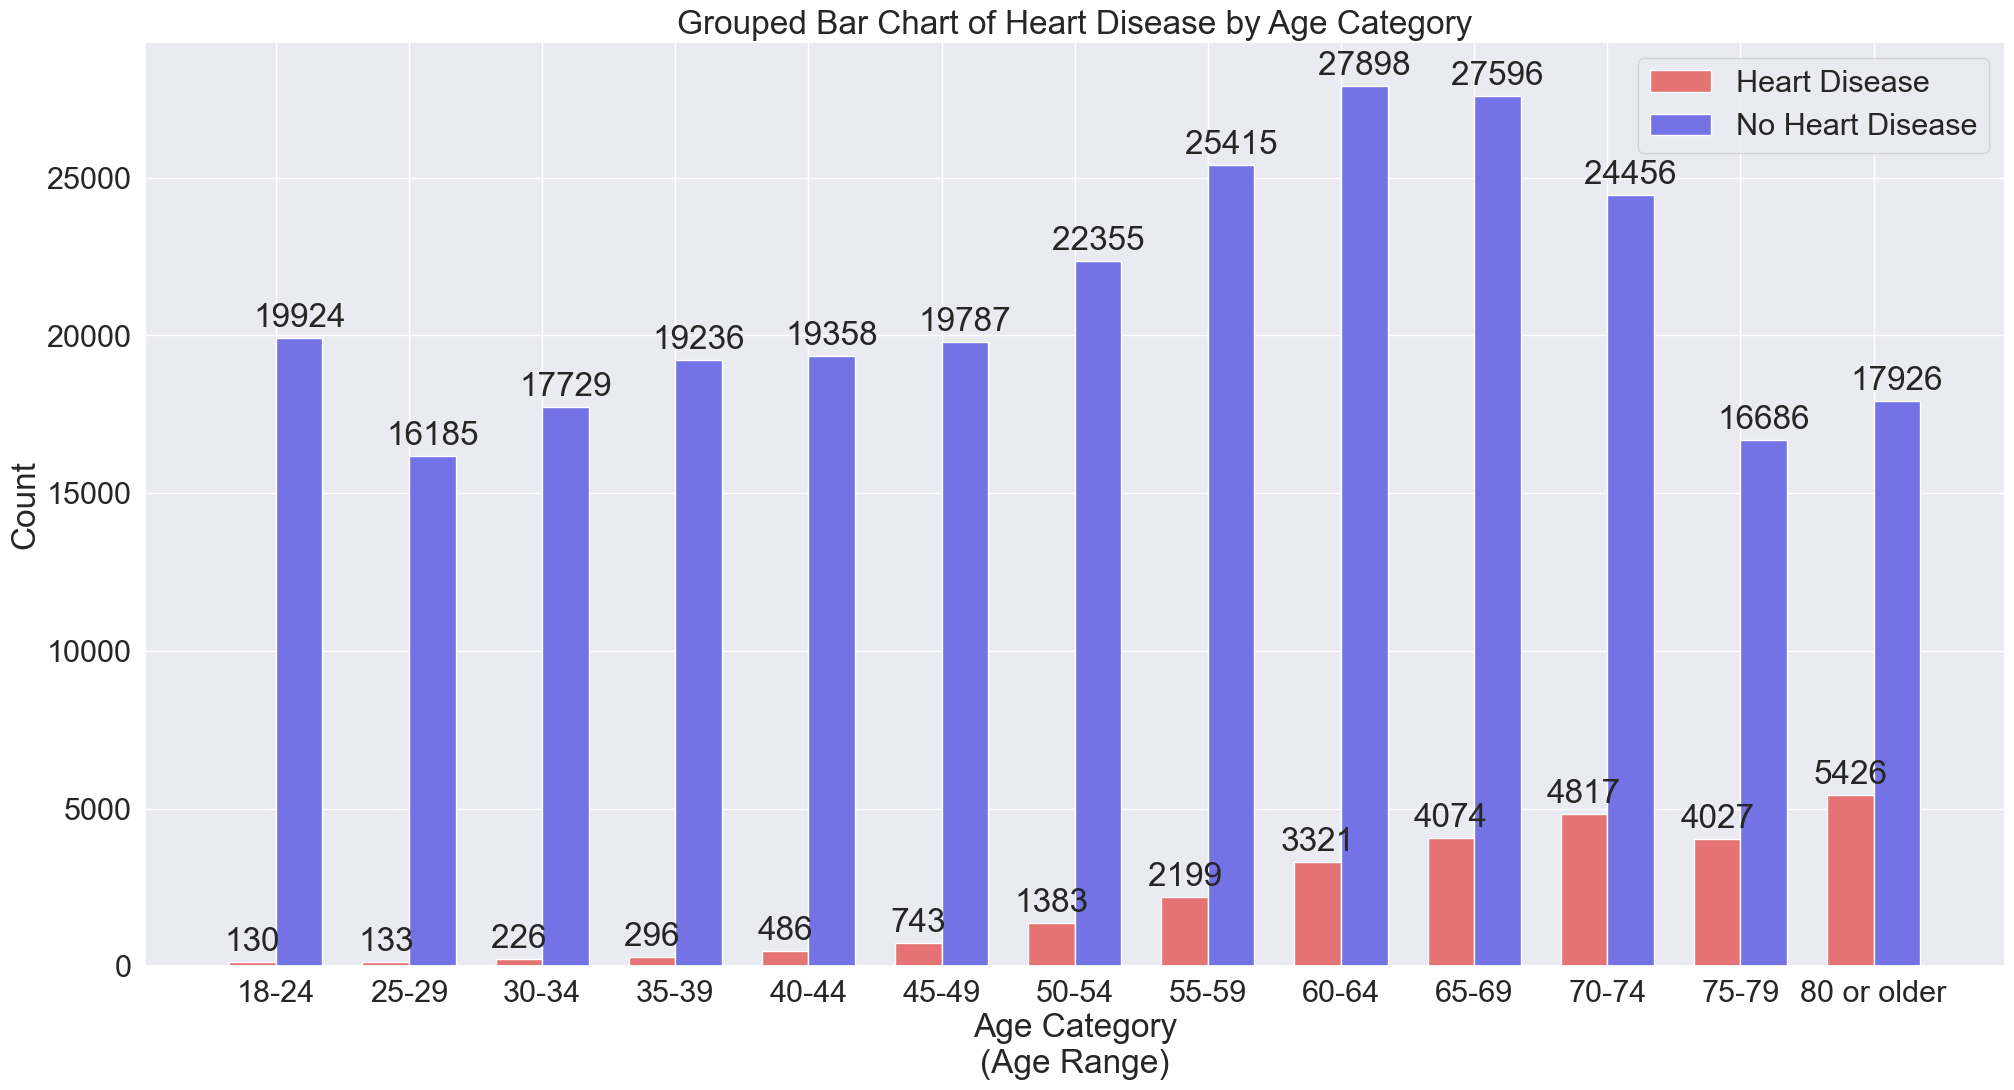

In [52]:
import numpy as np

heart_disease_counts = fullData.groupby(["AgeCategory", "HeartDisease"]).size().unstack()

desired_order = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(24, 12))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Age Category\n(Age Range)")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Age Category")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(desired_order)

ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.2 Correlation between Diabetic with Heart Disease

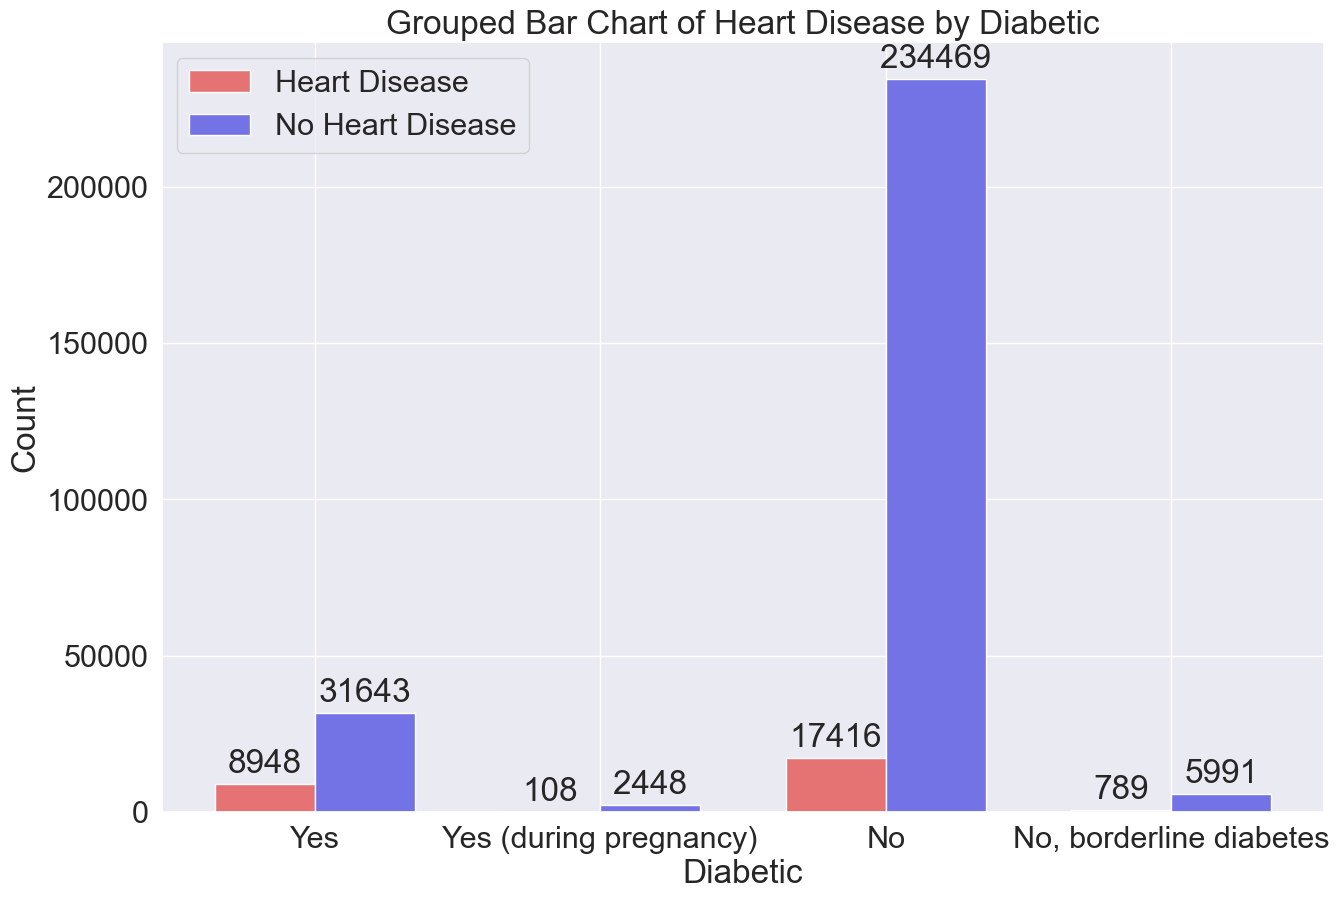

In [53]:
# Group the data by Diabetic and HeartDisease and calculate the count of occurrences
heart_disease_counts = fullData.groupby(["Diabetic", "HeartDisease"]).size().unstack()

# Define the desired order for the age categories
desired_order = ["Yes", "Yes (during pregnancy)", "No", "No, borderline diabetes"]

# Sort the heart_disease_counts DataFrame based on the desired order
heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Diabetic")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Diabetic")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(desired_order)
ax.legend()

# Add count labels to each bar
for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.3 Correlation between Race with Heart Disease

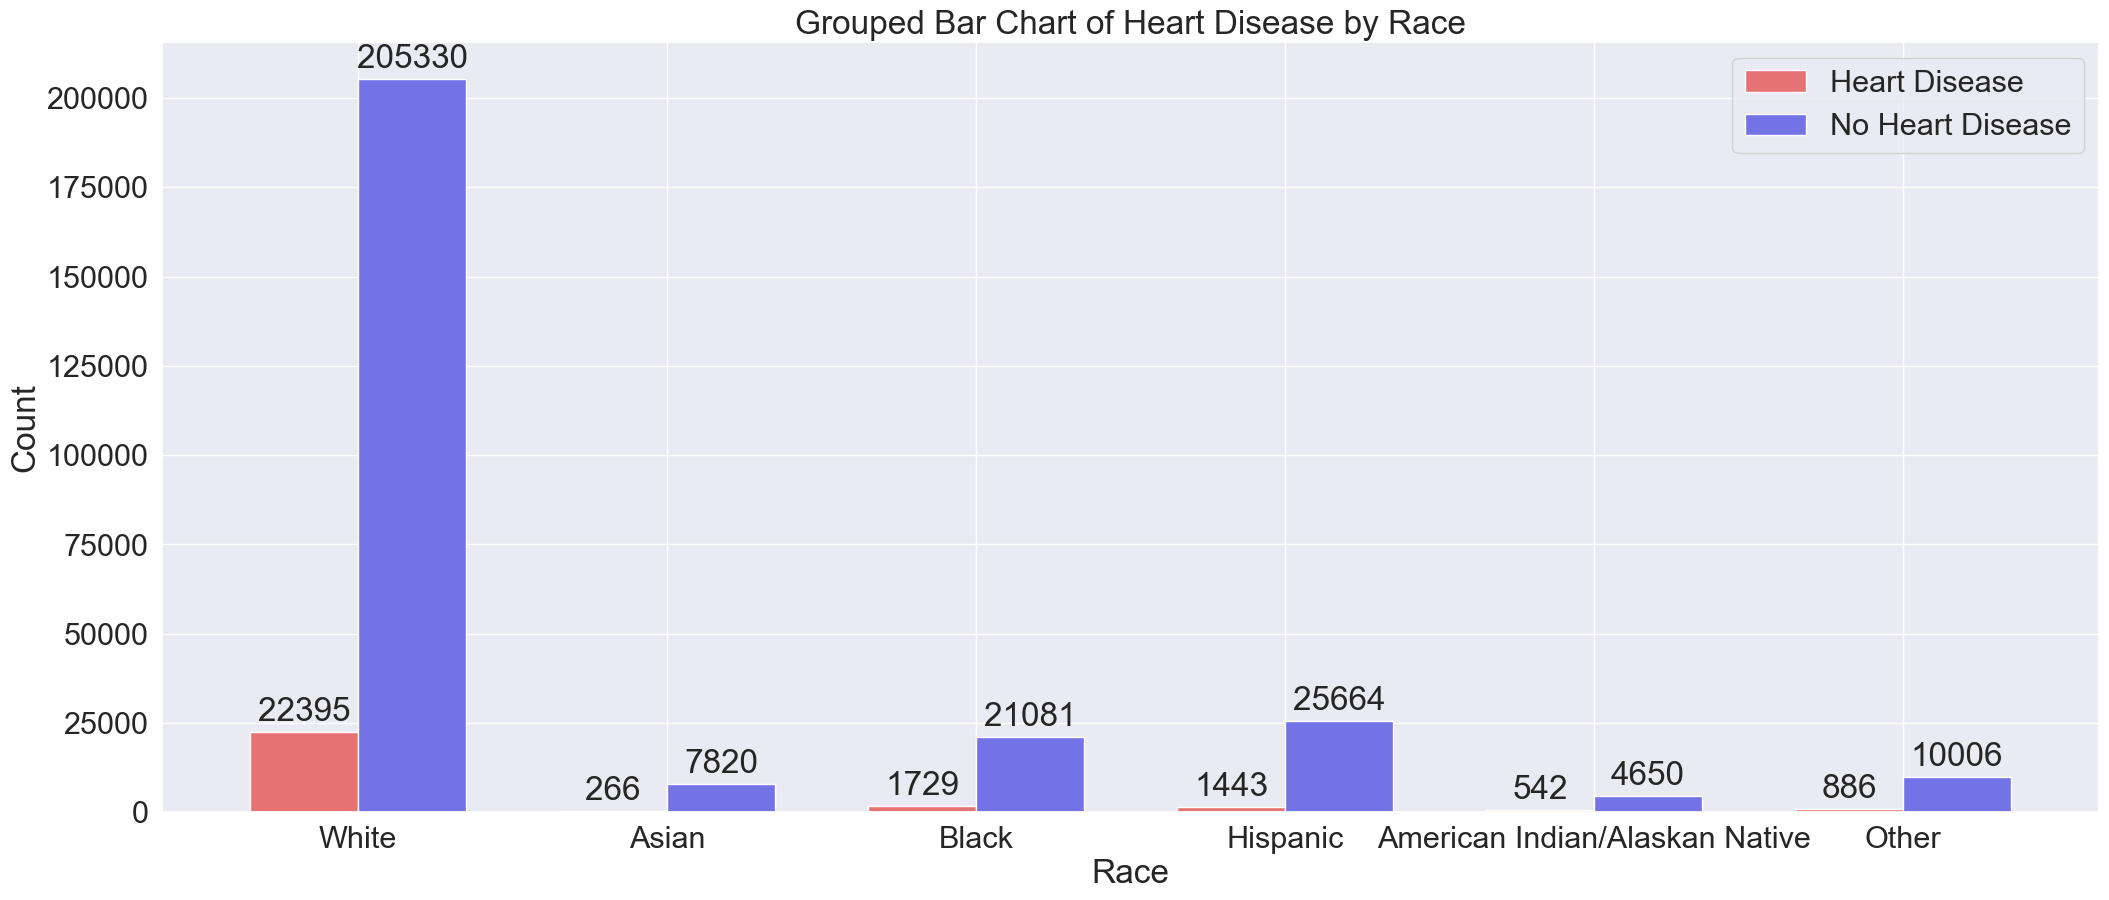

In [54]:
# Group the data by Diabetic and HeartDisease and calculate the count of occurrences
heart_disease_counts = fullData.groupby(["Race", "HeartDisease"]).size().unstack()

# Define the desired order for the age categories
desired_order = ["White", "Asian", "Black", "Hispanic","American Indian/Alaskan Native", "Other"]

# Sort the heart_disease_counts DataFrame based on the desired order
heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(25, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Race")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Race")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(desired_order)
ax.legend()

# Add count labels to each bar
for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.4 Correlation between GenHealth with Heart Disease

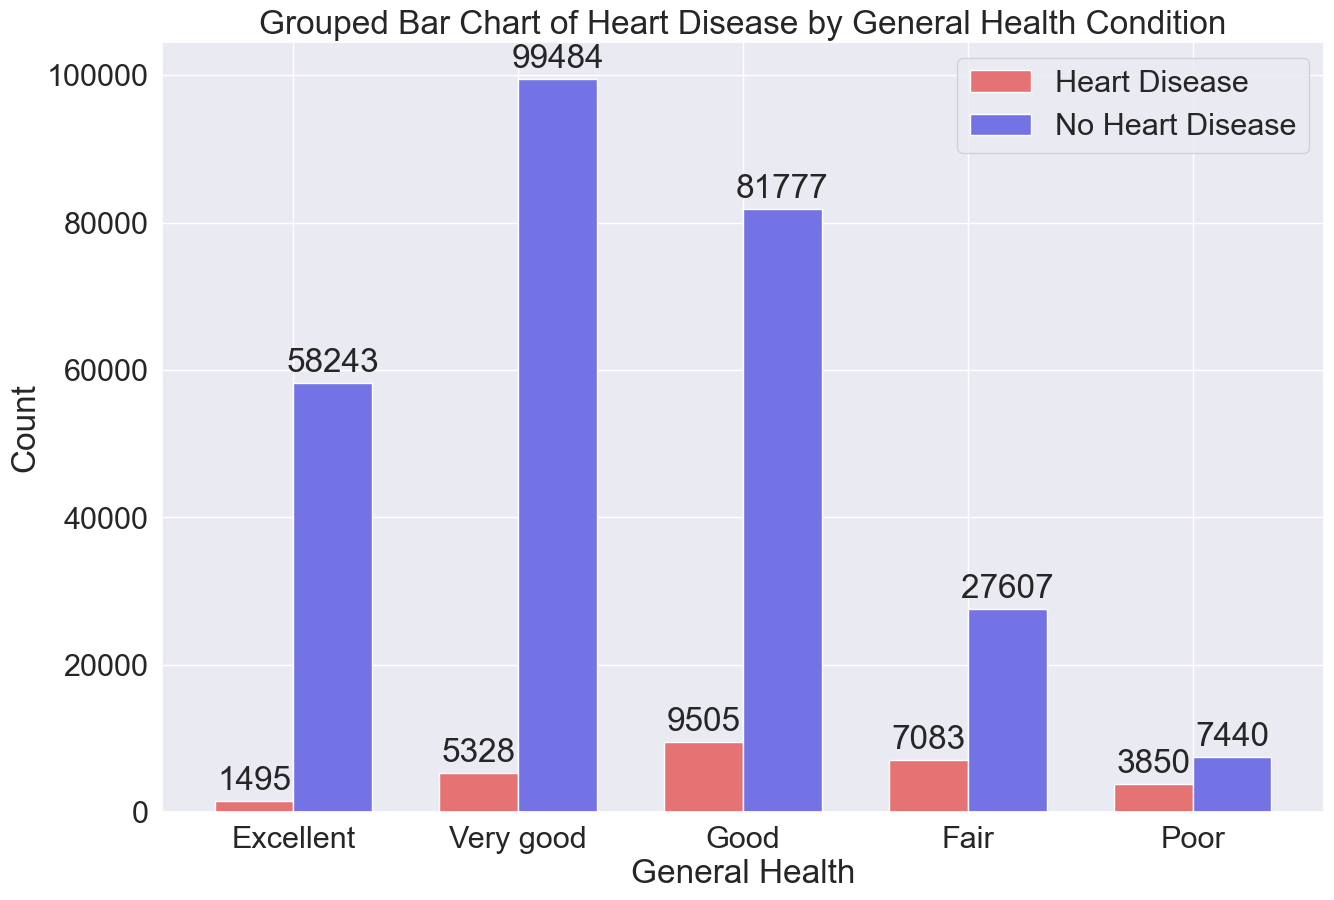

In [55]:
heart_disease_counts = fullData.groupby(["GenHealth", "HeartDisease"]).size().unstack()

desired_order = ["Excellent", "Very good", "Good", "Fair", "Poor"]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("General Health")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by General Health Condition")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(desired_order)
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.5 Correlation between Smoking with Heart Disease

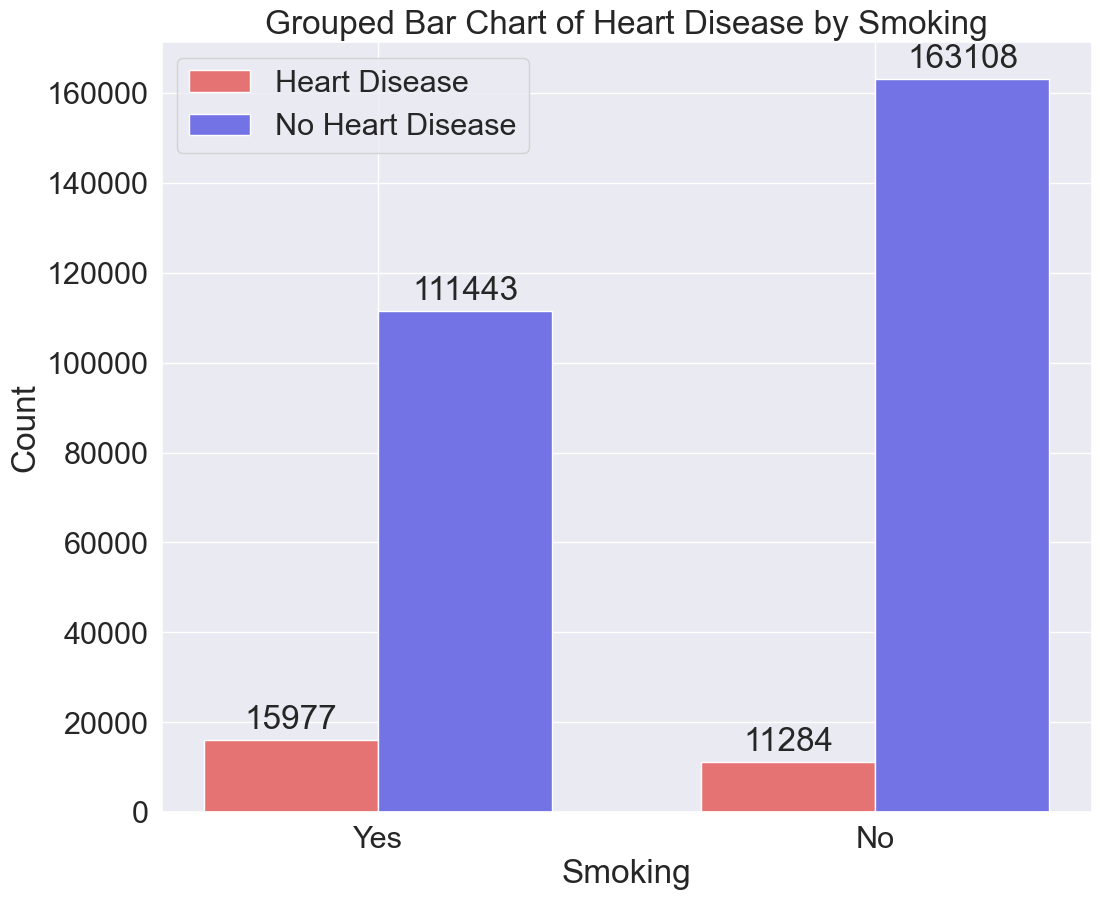

In [56]:
heart_disease_counts = fullData.groupby(["Smoking", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Smoking")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Smoking")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.6 Correlation between KidneyDisease with Heart Disease

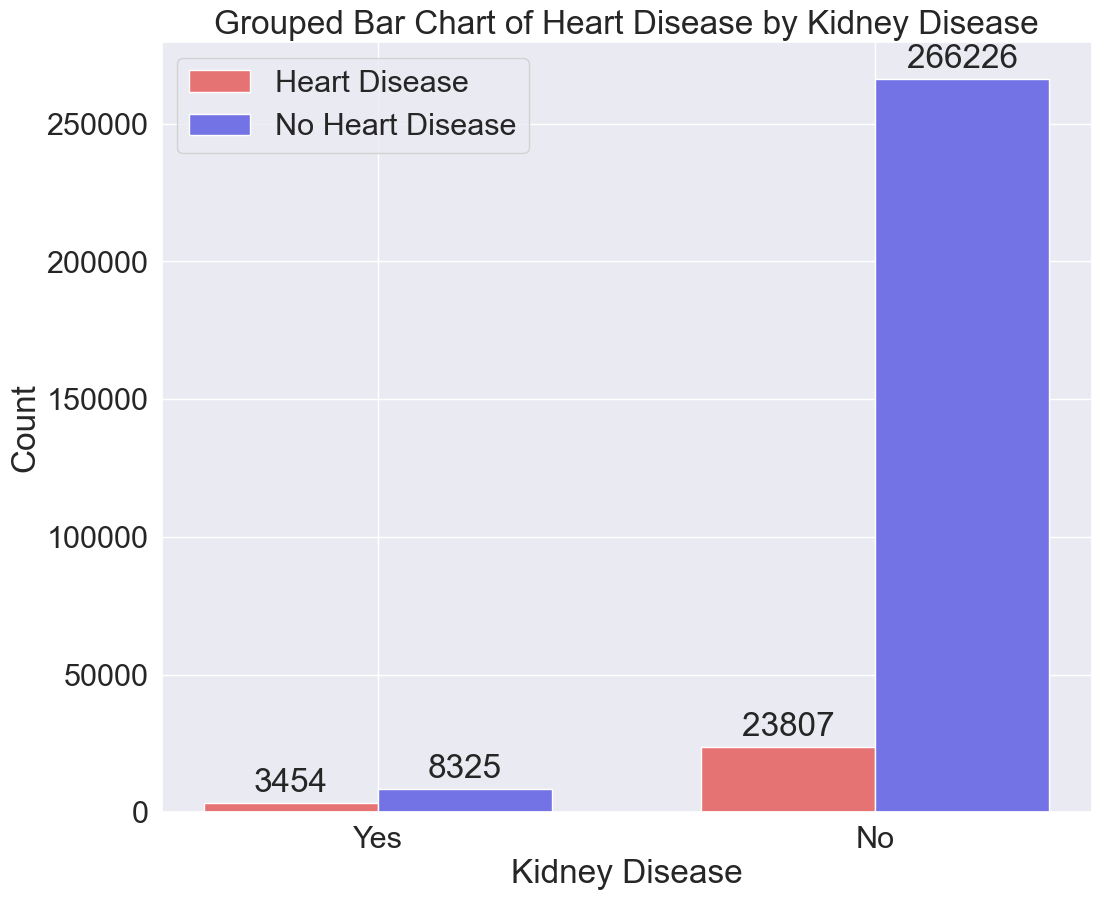

In [57]:
heart_disease_counts = fullData.groupby(["KidneyDisease", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Kidney Disease")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Kidney Disease")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.7 Correlation between AlcoholDrinking with Heart Disease

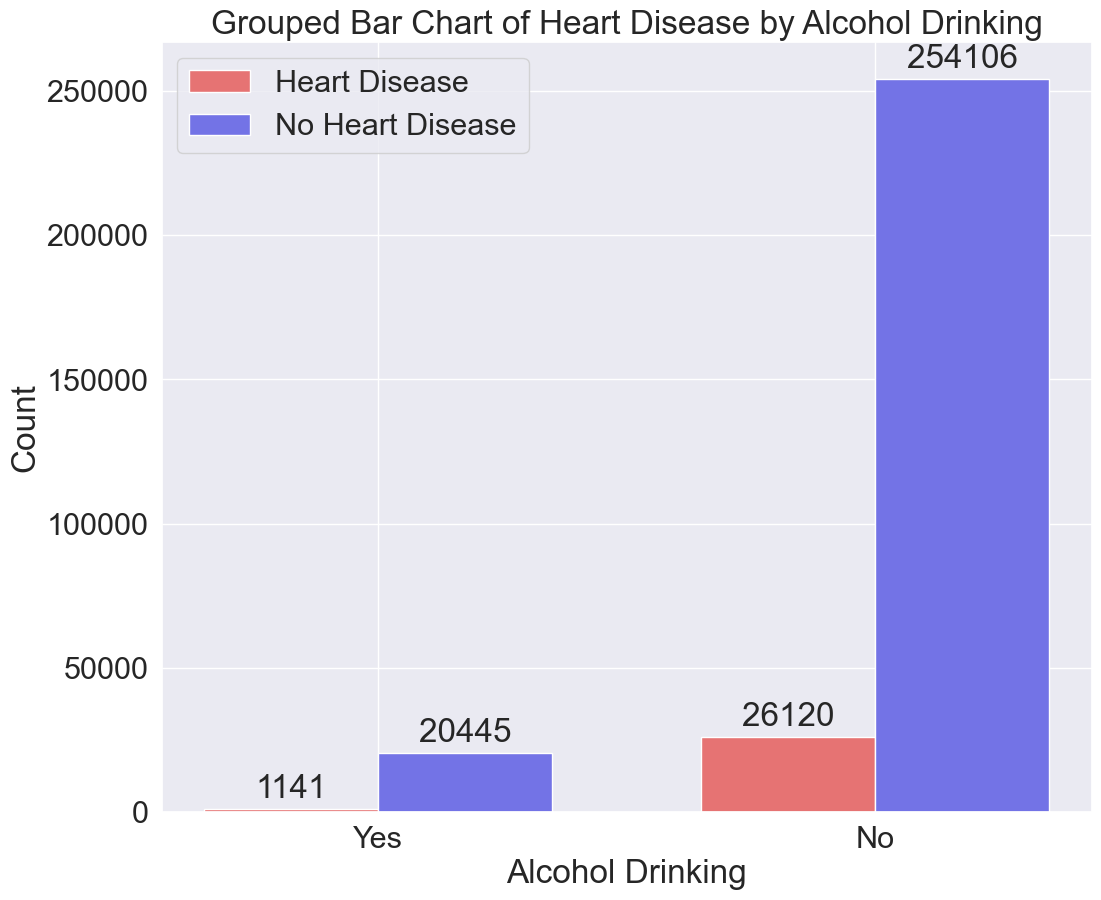

In [58]:
heart_disease_counts = fullData.groupby(["AlcoholDrinking", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Alcohol Drinking")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Alcohol Drinking")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.8 Correlation between Gender with Heart Disease

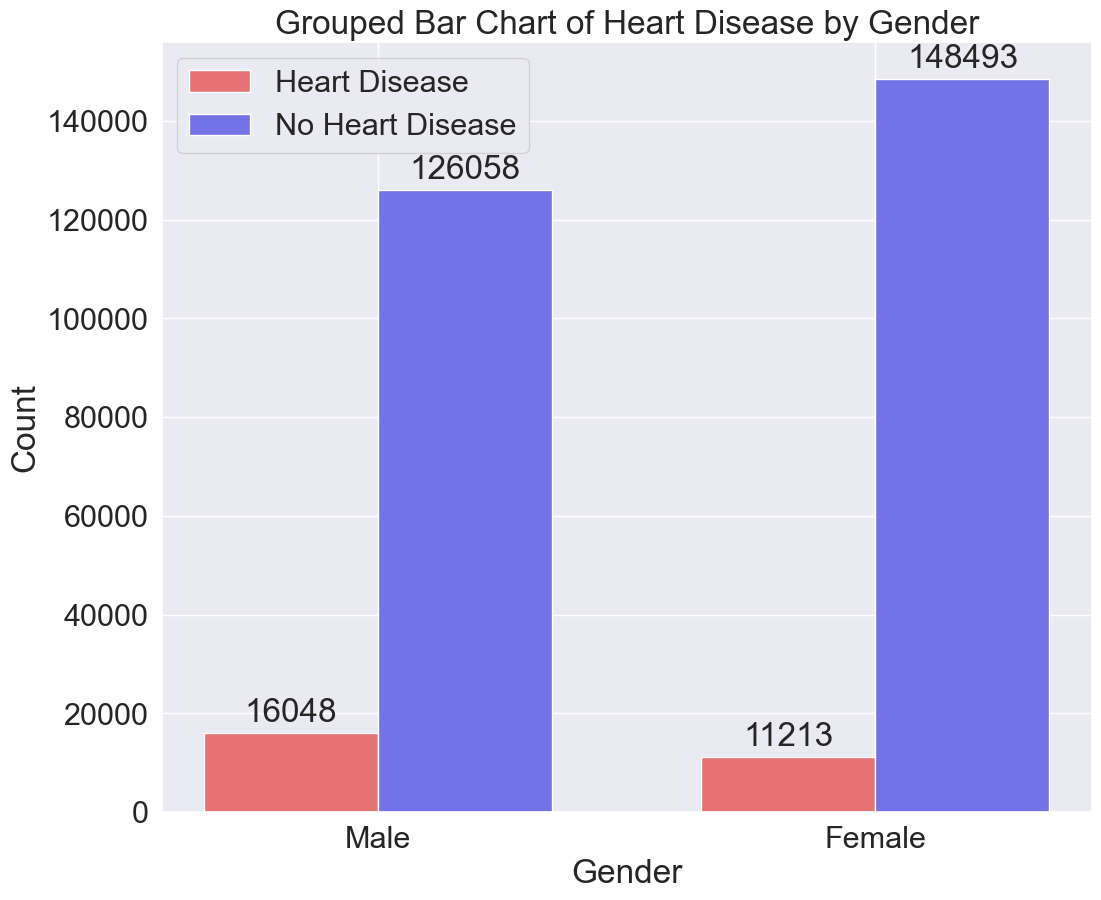

In [59]:
heart_disease_counts = fullData.groupby(["Sex", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Gender")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Male', 'Female'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.9 Correlation between Stroke with Heart Disease

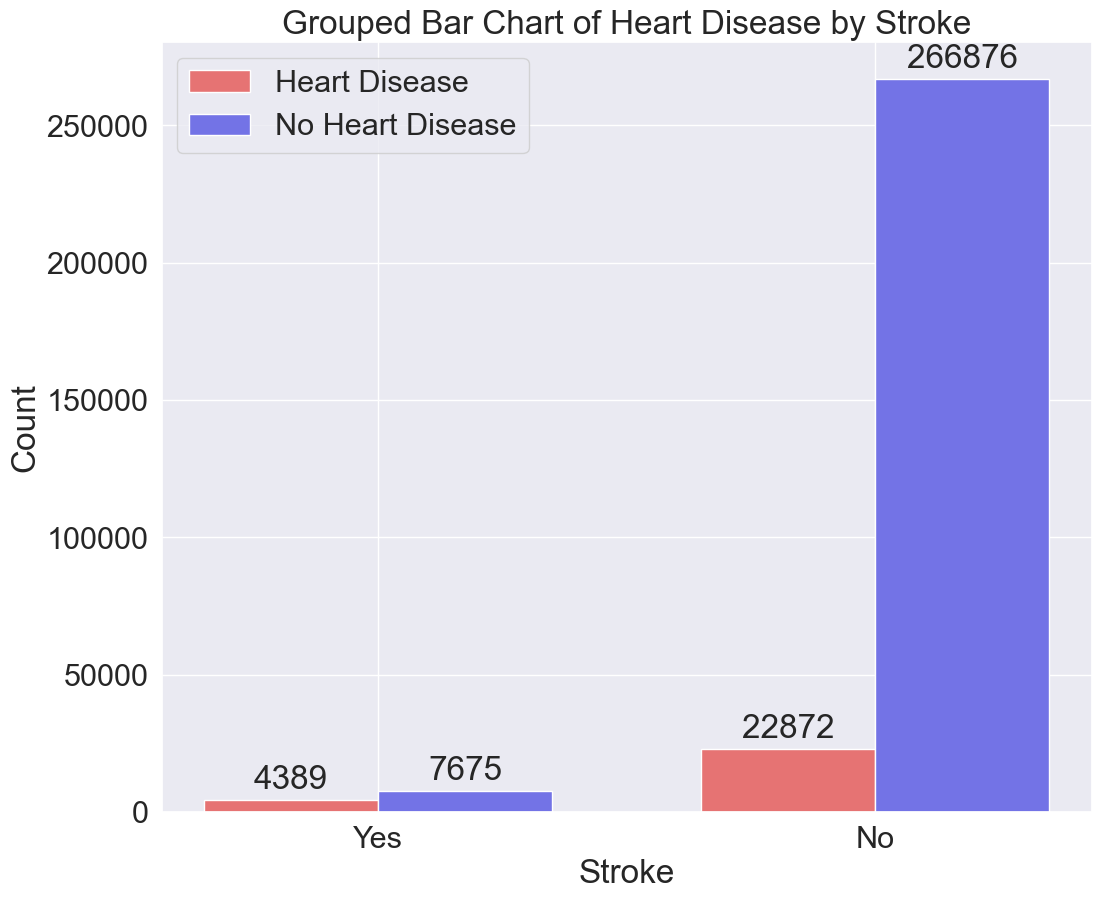

In [60]:
heart_disease_counts = fullData.groupby(["Stroke", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Stroke")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Stroke")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.10 Correlation between Asthma with Heart Disease

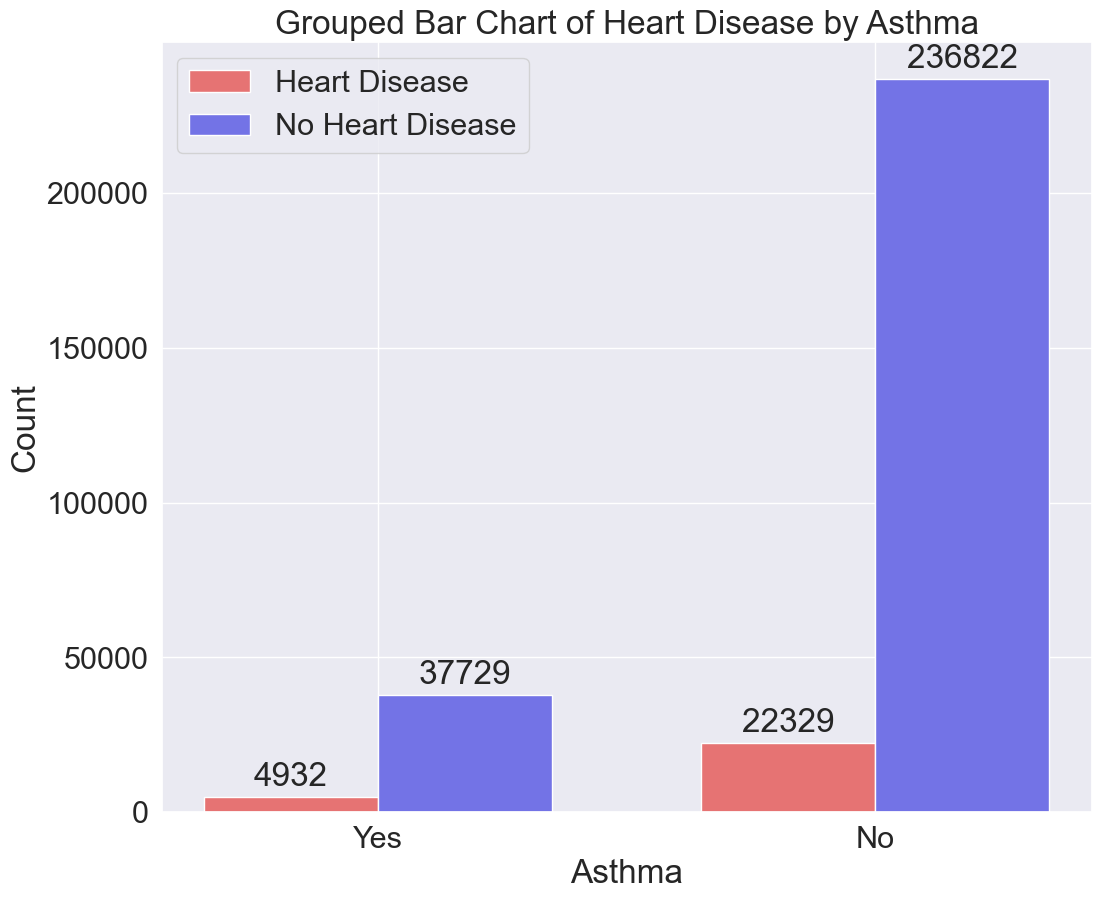

In [61]:
heart_disease_counts = fullData.groupby(["Asthma", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Asthma")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Asthma")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.11 Correlation between SkinCancer with Heart Disease

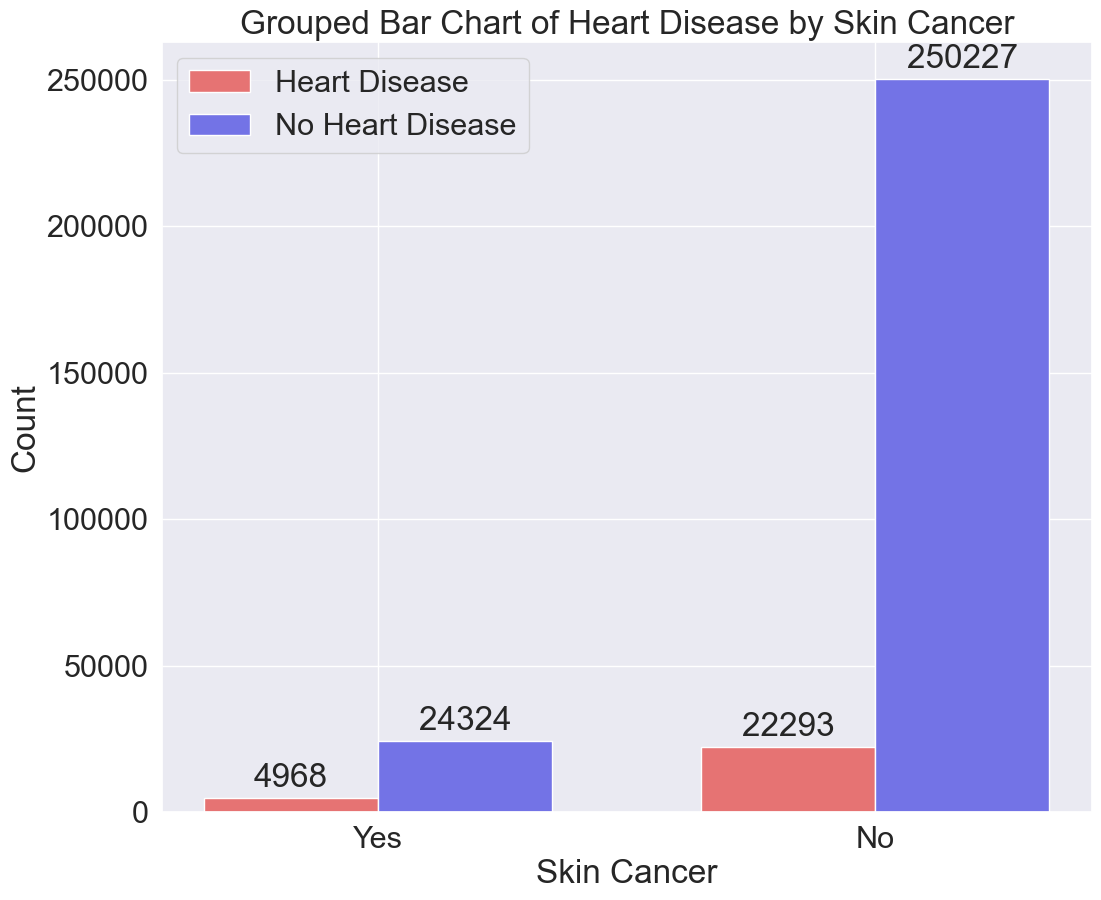

In [62]:
heart_disease_counts = fullData.groupby(["SkinCancer", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Skin Cancer")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Skin Cancer")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.12 Correlation between PhysicalActivity with Heart Disease

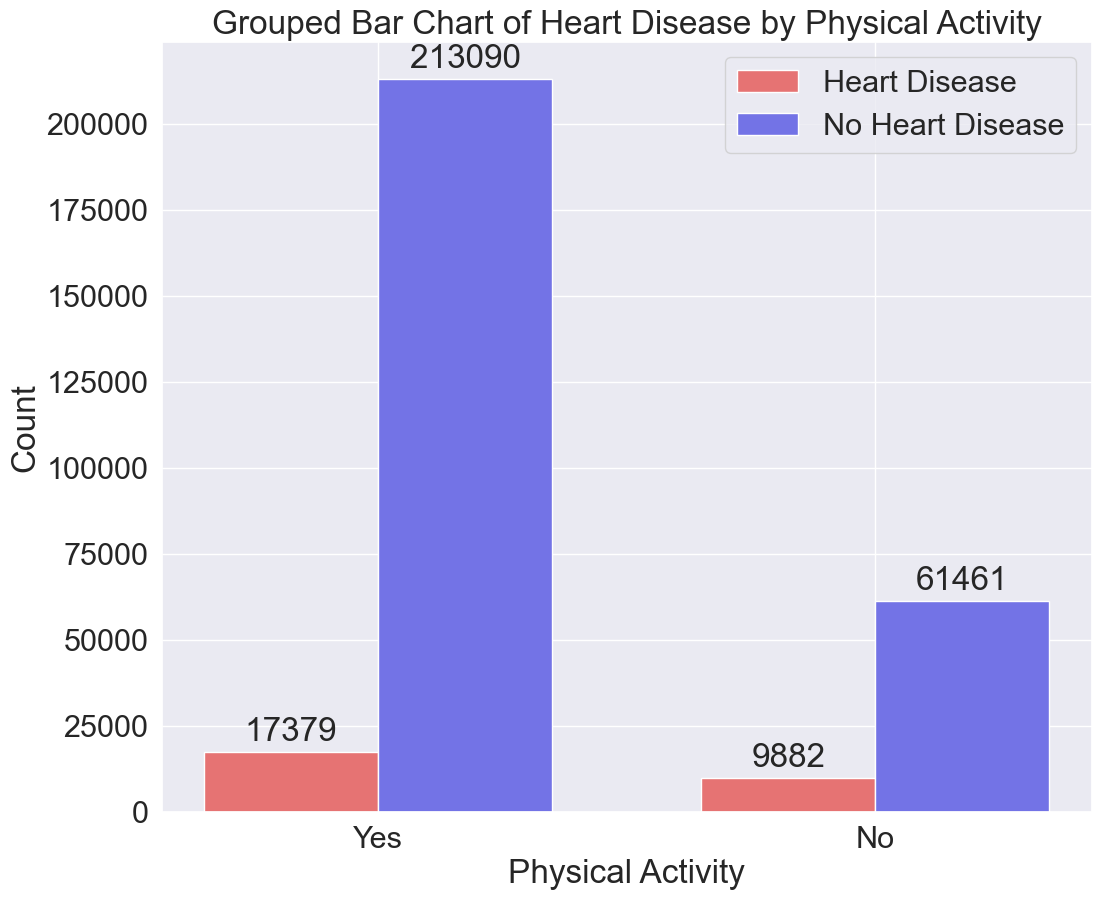

In [63]:
heart_disease_counts = fullData.groupby(["PhysicalActivity", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Physical Activity")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Physical Activity")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.13 Correlation between DiffWalking with Heart Disease

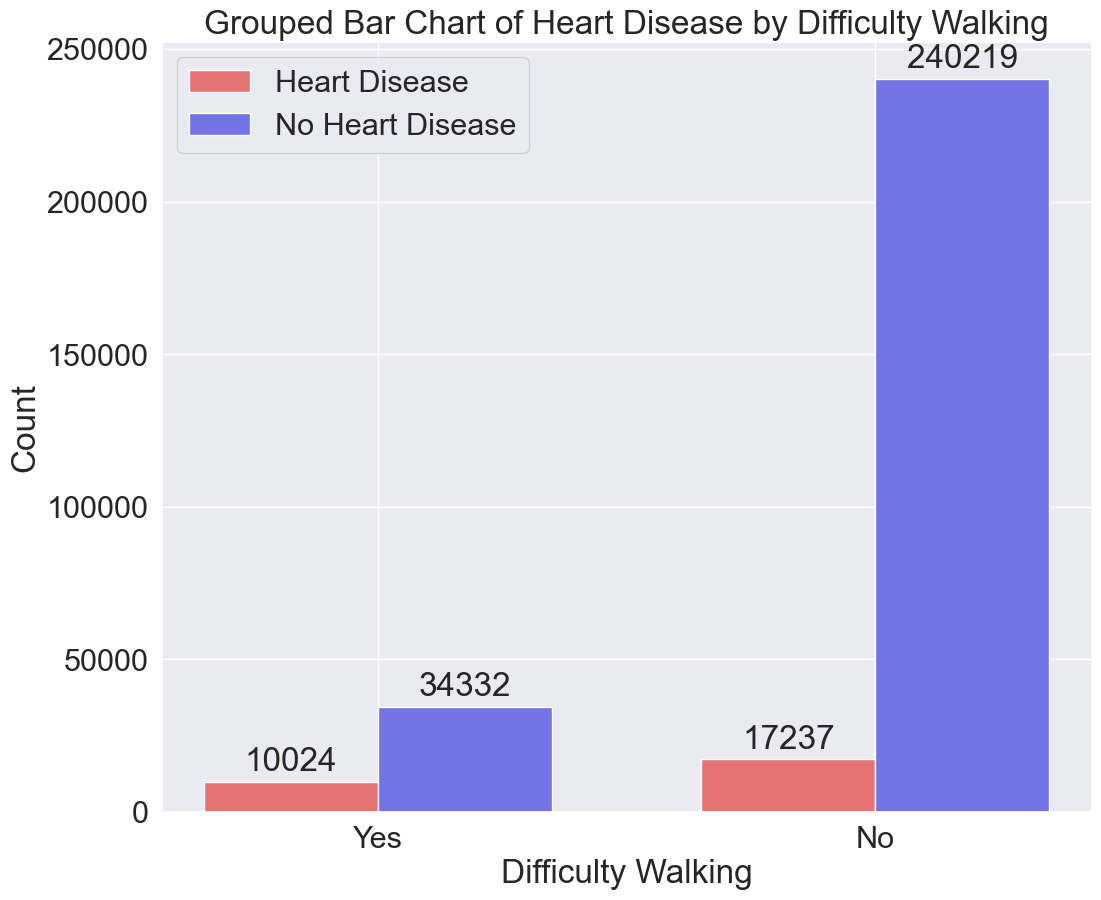

In [64]:
heart_disease_counts = fullData.groupby(["DiffWalking", "HeartDisease"]).size().unstack()

desired_order = [1, 0]

heart_disease_counts_sorted = heart_disease_counts.reindex(desired_order)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = np.arange(len(desired_order))

yes_bars = ax.bar(index, heart_disease_counts_sorted[1], bar_width, label='Heart Disease', color='#E67373')
no_bars = ax.bar(index + bar_width, heart_disease_counts_sorted[0], bar_width, label='No Heart Disease', color='#7373E6')

ax.set_xlabel("Difficulty Walking")
ax.set_ylabel("Count")
ax.set_title("Grouped Bar Chart of Heart Disease by Difficulty Walking")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Yes', 'No'])
ax.legend()

for rect in yes_bars + no_bars:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#### 3.1.14 Correlation between BMI with Heart Disease

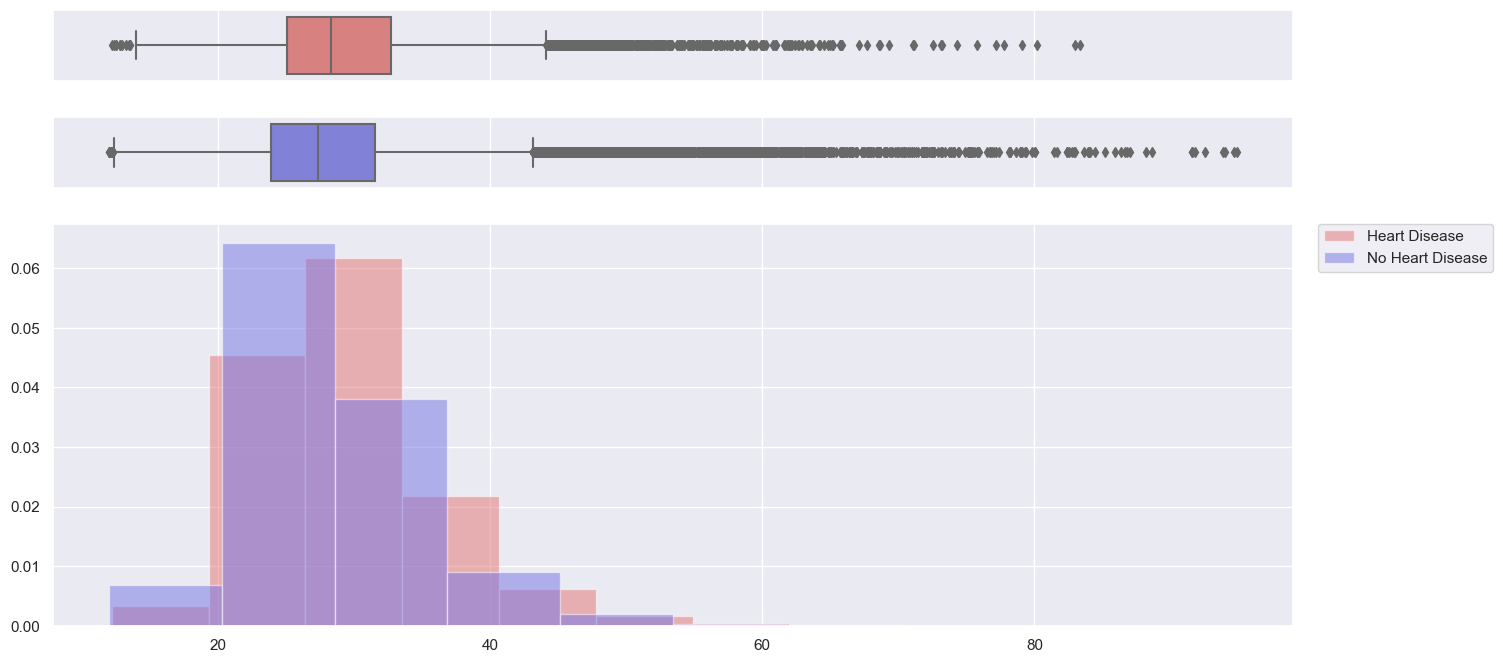

In [65]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 8)})

# Creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Extract 'BMI' values for heart disease and non-heart disease
heartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 1, "BMI"]
noHeartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 0, "BMI"]

# Assigning a graph to each ax
sns.boxplot(x=heartDiseaseBMI, ax=ax_box1, color="#E67373")
ax_hist.hist(heartDiseaseBMI, color="#E67373", alpha=0.5, label="Heart Disease", density=True)
sns.boxplot(x=noHeartDiseaseBMI, ax=ax_box2, color='#7373E6')
ax_hist.hist(noHeartDiseaseBMI, color='#7373E6', alpha=0.5, label="No Heart Disease", density=True)

# Remove x-axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

#### 3.1.15 Correlation between SleepTime with Heart Disease

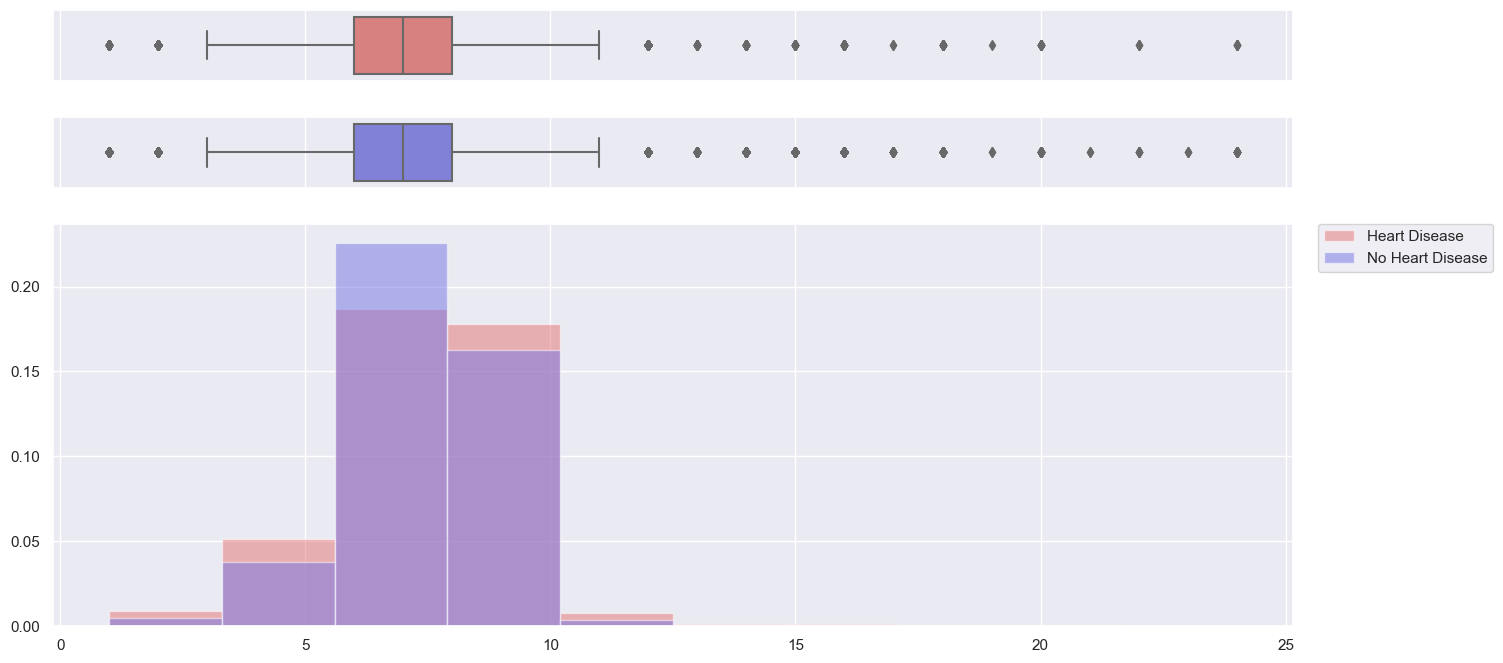

In [66]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 8)})

# Creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Extract 'SleepTime' values for heart disease and non-heart disease
heartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 1, "SleepTime"]
noHeartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 0, "SleepTime"]

# Assigning a graph to each ax
sns.boxplot(x=heartDiseaseBMI, ax=ax_box1, color="#E67373")
ax_hist.hist(heartDiseaseBMI, color="#E67373", alpha=0.5, label="Heart Disease", density=True)
sns.boxplot(x=noHeartDiseaseBMI, ax=ax_box2, color='#7373E6')
ax_hist.hist(noHeartDiseaseBMI, color='#7373E6', alpha=0.5, label="No Heart Disease", density=True)

# Remove x-axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

#### 3.1.16 Correlation between PhysicalHealth with Heart Disease

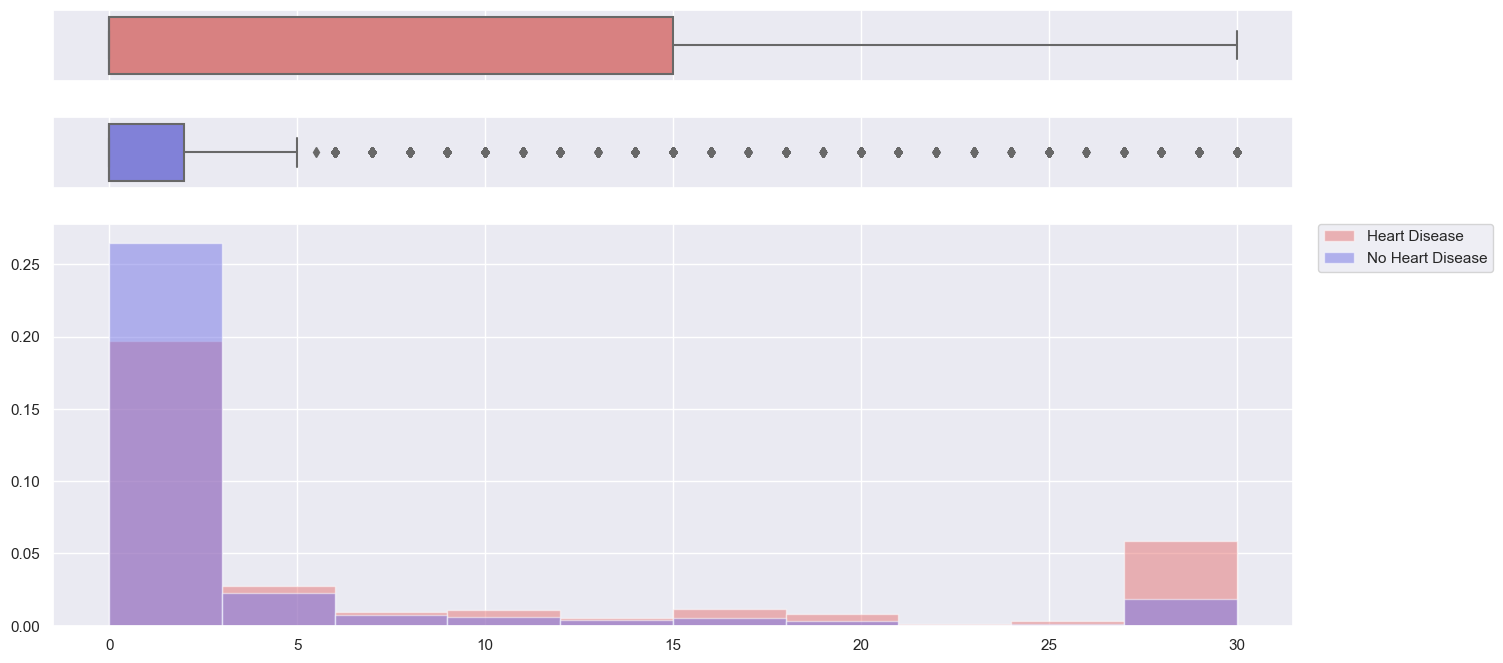

In [67]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 8)})

# Creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Extract 'SleepTime' values for heart disease and non-heart disease
heartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 1, "PhysicalHealth"]
noHeartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 0, "PhysicalHealth"]

# Assigning a graph to each ax
sns.boxplot(x=heartDiseaseBMI, ax=ax_box1, color="#E67373")
ax_hist.hist(heartDiseaseBMI, color="#E67373", alpha=0.5, label="Heart Disease", density=True)
sns.boxplot(x=noHeartDiseaseBMI, ax=ax_box2, color='#7373E6')
ax_hist.hist(noHeartDiseaseBMI, color='#7373E6', alpha=0.5, label="No Heart Disease", density=True)

# Remove x-axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

#### 3.1.17 Correlation between MentalHealth with Heart Disease

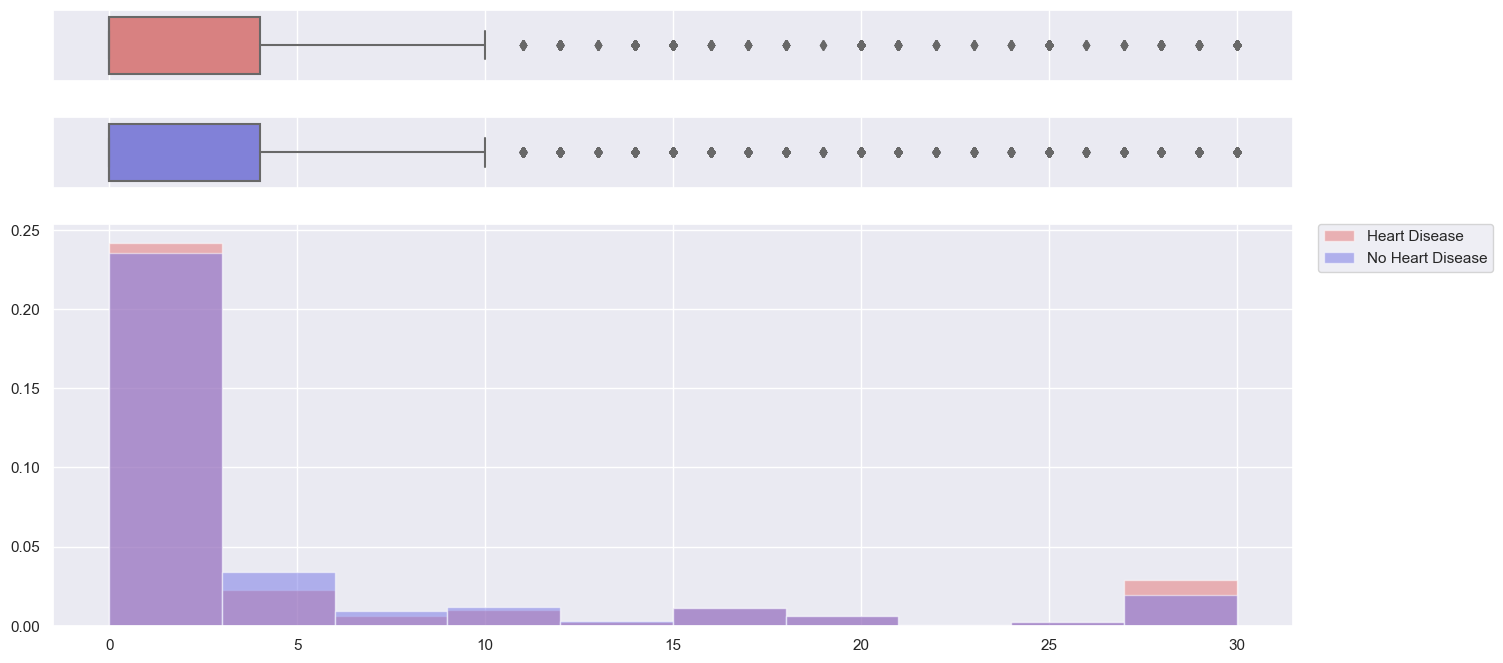

In [68]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 8)})

# Creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Extract 'SleepTime' values for heart disease and non-heart disease
heartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 1, "MentalHealth"]
noHeartDiseaseBMI = fullData.loc[fullData['HeartDisease'] == 0, "MentalHealth"]

# Assigning a graph to each ax
sns.boxplot(x=heartDiseaseBMI, ax=ax_box1, color="#E67373")
ax_hist.hist(heartDiseaseBMI, color="#E67373", alpha=0.5, label="Heart Disease", density=True)
sns.boxplot(x=noHeartDiseaseBMI, ax=ax_box2, color='#7373E6')
ax_hist.hist(noHeartDiseaseBMI, color='#7373E6', alpha=0.5, label="No Heart Disease", density=True)

# Remove x-axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### 3.2 Visualization For Project Development

In [69]:
fullData.drop(['AgeCategory'],axis=1,inplace=True)
fullData.drop(['Race'],axis=1,inplace=True)
fullData.drop(['Diabetic'],axis=1,inplace=True)
fullData.drop(['GenHealth'],axis=1,inplace=True)

In [71]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301812 entries, 0 to 319794
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301812 non-null  uint8  
 1   BMI                                  301812 non-null  float64
 2   Smoking                              301812 non-null  uint8  
 3   AlcoholDrinking                      301812 non-null  uint8  
 4   Stroke                               301812 non-null  uint8  
 5   PhysicalHealth                       301812 non-null  float64
 6   MentalHealth                         301812 non-null  float64
 7   DiffWalking                          301812 non-null  uint8  
 8   Sex                                  301812 non-null  uint8  
 9   PhysicalActivity                     301812 non-null  uint8  
 10  SleepTime                            301812 non-null  float64
 11  Asthma            

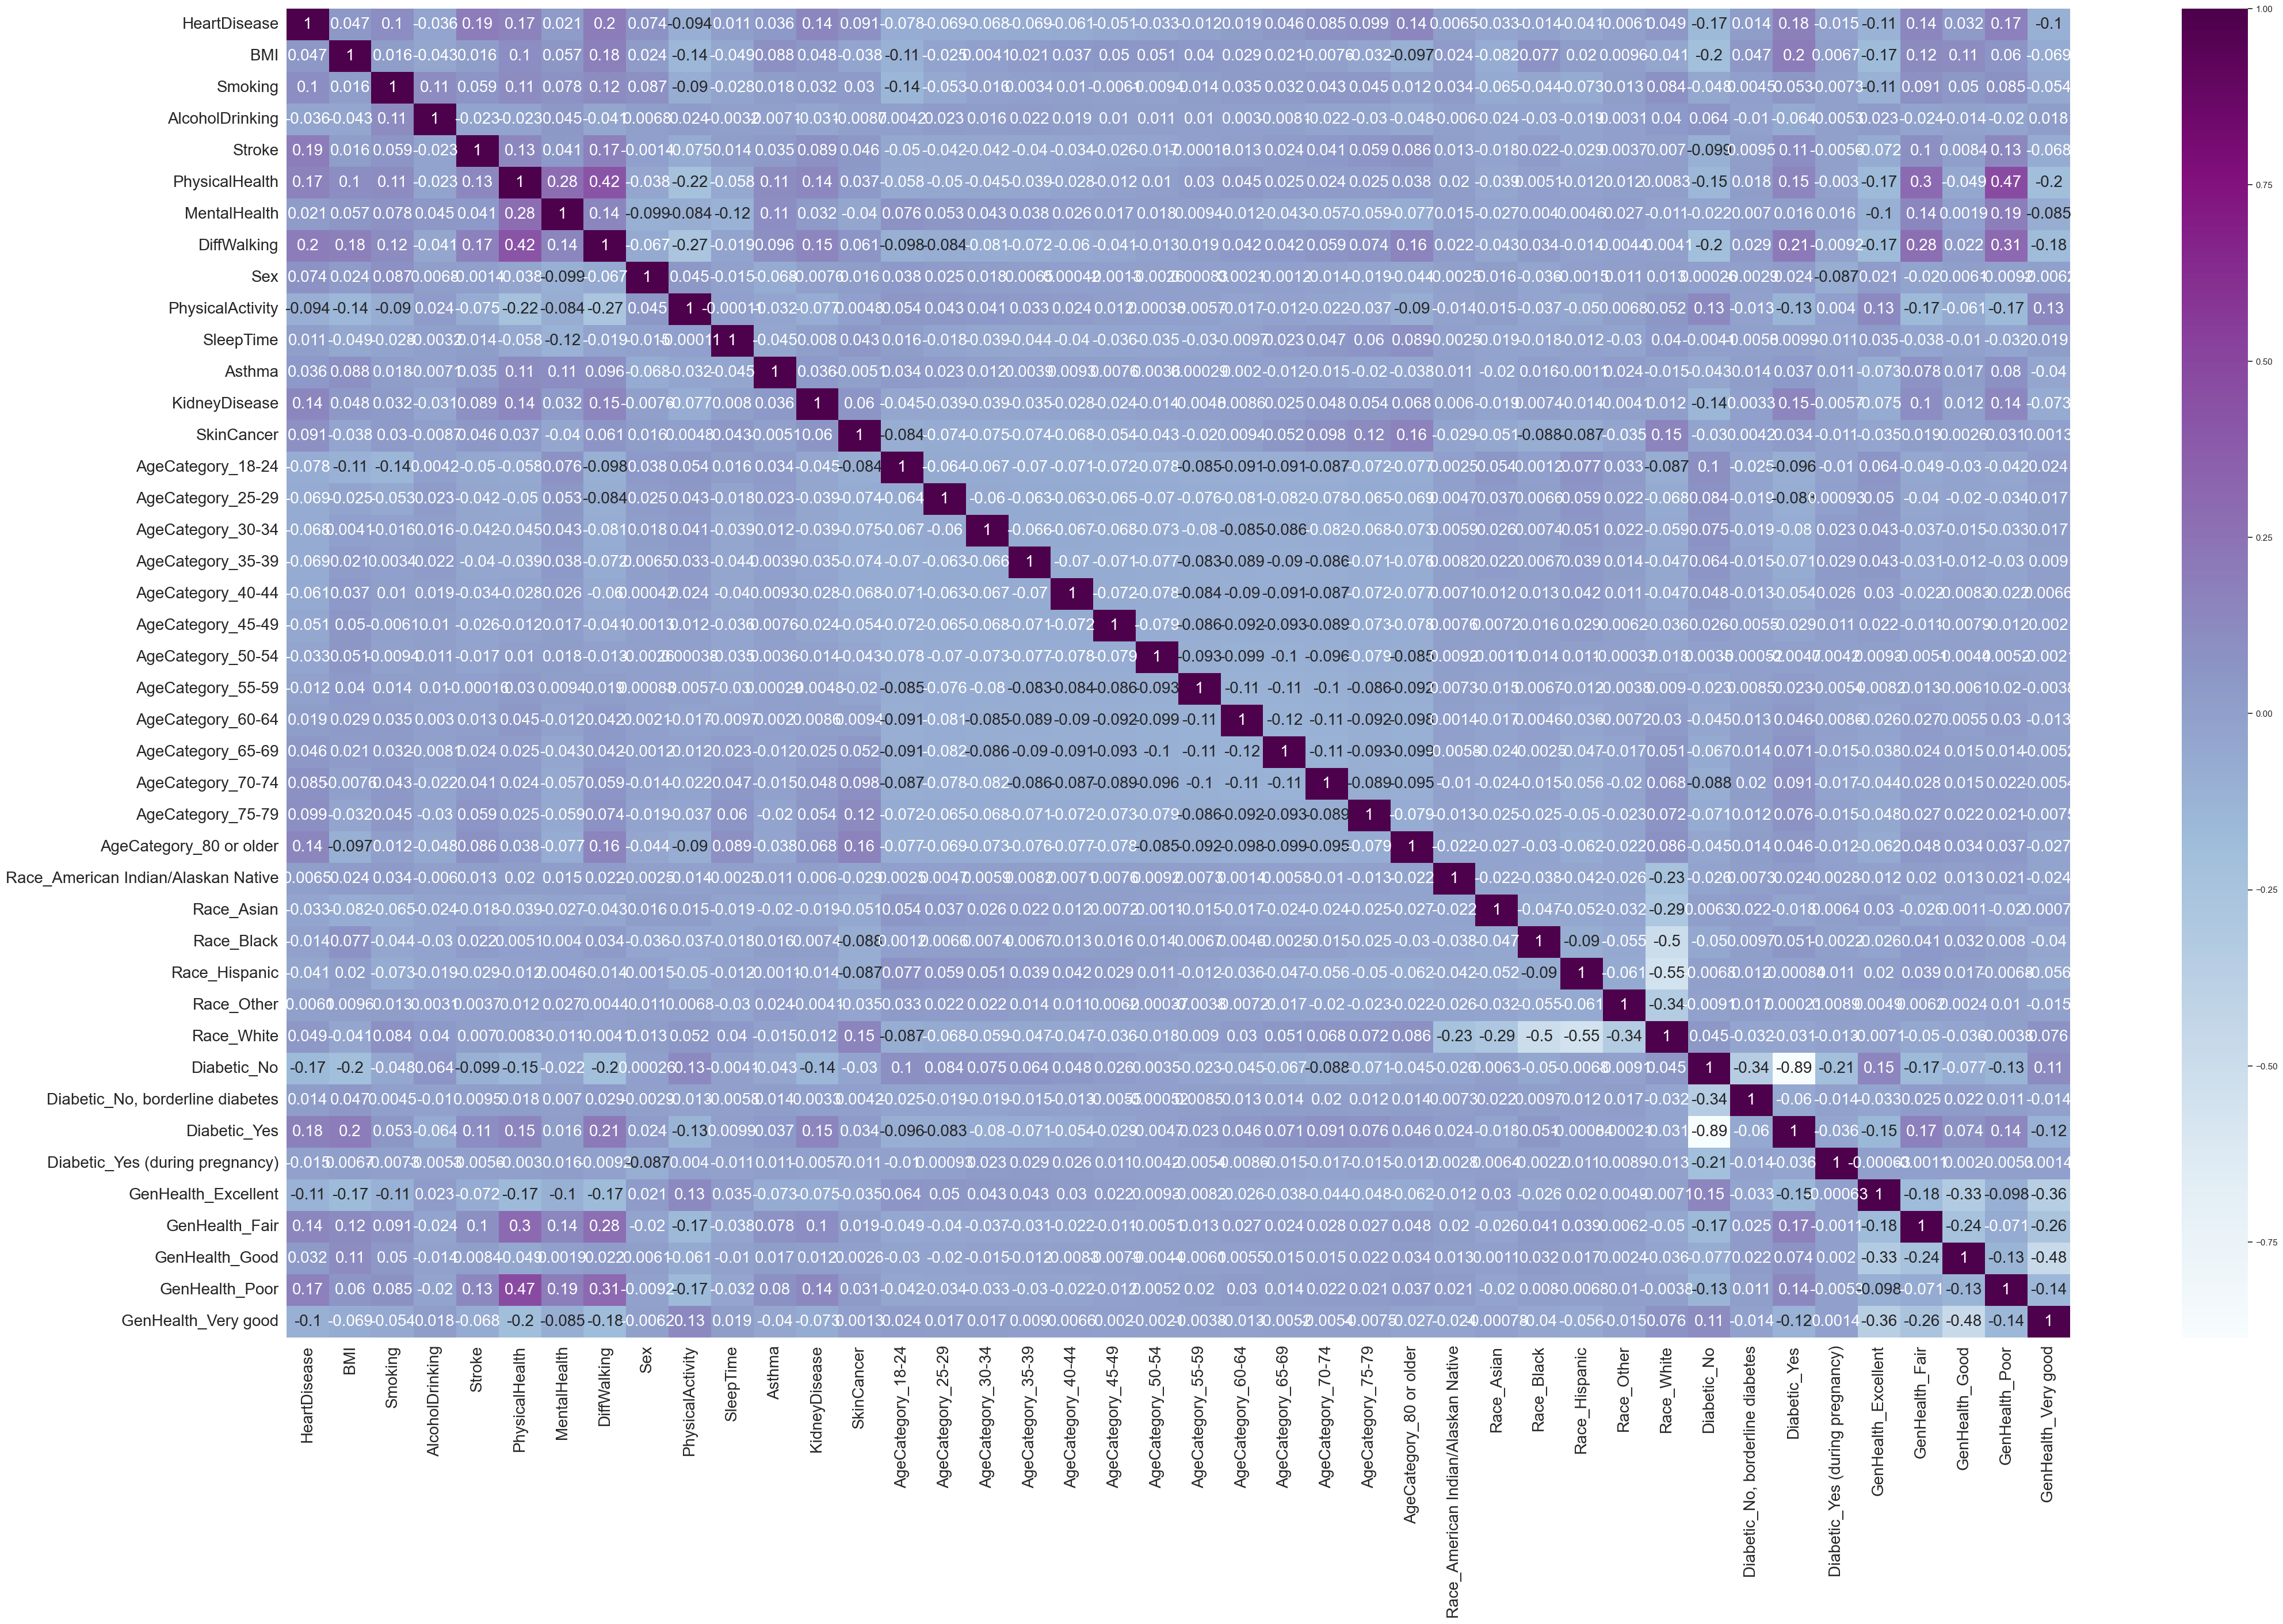

In [72]:
plt.figure(figsize=(50, 30))
heatmap = sns.heatmap(fullData.corr(), annot=True, cmap="BuPu", annot_kws={"size": 20})

# Enlarge x-axis label
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)

# Enlarge y-axis label
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.show()

Your selected dataframe has 42 columns.
There are 0 columns that have missing values.
HeartDisease
0    274551
1     27261
Name: count, dtype: int64


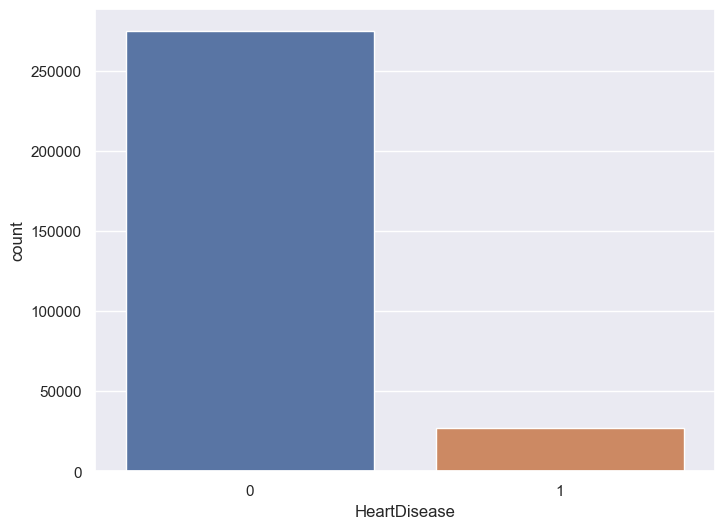

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x= fullData['HeartDisease'])

missingValuesTable(fullData)

print(fullData['HeartDisease'].value_counts())

In [74]:
print(fullData['Sex'].value_counts())

Sex
0    159706
1    142106
Name: count, dtype: int64


## Stage 4: Model Building Preparation

### 4.1 Dataset Splitting

In [75]:
# Separating Input (x) with Target (y)
x = fullData.drop(['HeartDisease'], axis=1)
y = fullData['HeartDisease']

### 4.2 Normalization

In [76]:
# Normalization

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [77]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [78]:
print(x_scaled)

[[0.19823735 0.         0.         ... 0.         0.         0.        ]
 [0.19823735 0.         0.         ... 1.         0.         0.        ]
 [0.19823735 0.         0.         ... 1.         0.         0.        ]
 ...
 [0.14753109 0.         0.         ... 1.         0.         0.        ]
 [0.25099602 0.         0.         ... 1.         0.         0.        ]
 [0.41699867 0.         0.         ... 1.         0.         0.        ]]


### 4.3 Train-Test Split

In [79]:
# Splitting the Train-Test Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

211268
90544
211268
90544


### 4.4 Data Sampling

In [80]:
# Sampling Method: Undersampling

print("Before Undersampling: ", Counter(y_train))
rus = RandomUnderSampler(random_state=42) 
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)


print("After Undersampling: ", Counter(y_train_undersampled))

Before Undersampling:  Counter({0: 192185, 1: 19083})
After Undersampling:  Counter({0: 19083, 1: 19083})


In [81]:
# Sampling Method: Oversampling

print("Before SMOTE sampling: ", Counter(y_train))
# Apply SMOTE only to the training set
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)

print("After SMOTE sampling: ", Counter(y_train_oversampled))

Before SMOTE sampling:  Counter({0: 192185, 1: 19083})


After SMOTE sampling:  Counter({0: 192185, 1: 192185})


In [82]:
# Sampling Method: Combined Sampling (SMOTE & RandomUnderSampler)

print("Before sampling: ", Counter(y_train))

# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# fit and apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(x_train, y_train)

print("After sampling: ", Counter(y_resampled))

Before sampling:  Counter({0: 192185, 1: 19083})
After sampling:  Counter({0: 57655, 1: 57655})


## Stage 5: Model Building

### 5.1 Model Building for Undersampling

In [83]:
# Model Performance Metrics Function
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=x_train_undersampled,y=y_train_undersampled,cv=5, verbose=2)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(x_train_undersampled,y_train_undersampled)
    y_pred=model.predict(x_test)
    cross=cross_val(model)
    print(classification_report(y_test,y_pred))
    print (confusion_matrix(y_test,y_pred))
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [84]:
# Models Performance Metrics Comparison
# models=[AdaBoostClassifier()]
models=[MLPClassifier(),LinearSVC(),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
# models = [svm.SVC(kernel='linear')]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
  print(model.__class__.__name__)
  results = fit_evaluate(model)
  result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

MLPClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  22.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s


[CV] END .................................................... total time=  22.4s
[CV] END .................................................... total time=  22.3s
[CV] END .................................................... total time=  21.6s
[CV] END .................................................... total time=  21.4s
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     82366
           1       0.21      0.79      0.33      8178

    accuracy                           0.71     90544
   macro avg       0.59      0.75      0.57     90544
weighted avg       0.90      0.71      0.77     90544

[[57939 24427]
 [ 1701  6477]]
LinearSVC


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60464 21902]
 [ 1805  6373]]
RandomForestClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   4.1s
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     82366
           1       0.20      0.76      0.32      8178

    accuracy                           0.71     90544
   macro avg       0.58      0.73      0.57     90544
weighted avg       0.90      0.71      0.77     90544

[[57911 24455]
 [ 1992  6186]]
XGBClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     82366
           1       0.22      0.78      0.34      8178

    accuracy                           0.73     90544
   macro avg       0.59      0.75      0.58     90544
weighted avg       0.90      0.73      0.78     90544

[[59436 22930]
 [ 1762  6416]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


DecisionTreeClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
              precision    recall  f1-score   support

           0       0.95      0.67      0.78     82366
           1       0.17      0.67      0.26      8178

    accuracy                           0.67     90544
   macro avg       0.56      0.67      0.52     90544
weighted avg       0.88      0.67      0.74     90544

[[54811 27555]
 [ 2725  5453]]
KNeighborsClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     82366
           1       0.20      0.73      0.32      8178

    accuracy                           0.72     90544
   macro avg       0.58      0.72      0.57     90544
weighted avg       0.90      0.72      0.78     90544

[[59144 23222]
 [ 2225  5953]]
AdaBoostClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.4s
[CV] END .................................................... total time=   1.4s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   1.4s
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     82366
           1       0.23      0.77      0.35      8178

    accuracy                           0.75     90544
   macro avg       0.60      0.76      0.60     90544
weighted avg       0.90      0.75      0.80     90544

[[61302 21064]
 [ 1913  6265]]
GradientBoostingClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.1s
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60428 21938]
 [ 1783  6395]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.2s finished


model  accuracy_train_cv  accuracy_test  \
0               MLPClassifier          74.917475      71.143312   
0               XGBClassifier          75.336702      72.729281   
0  GradientBoostingClassifier          76.154174      73.801688   
0                   LinearSVC          76.143699      73.817150   
0          AdaBoostClassifier          76.033656      74.623388   
0      RandomForestClassifier          73.680780      70.790997   
0        KNeighborsClassifier          72.352366      71.895432   
0      DecisionTreeClassifier          66.388951      66.557696   

   precision_score  recall_score   f1_score  roc_auc_score  
0        20.958452     79.200293  33.145694      74.771820  
0        21.863286     78.454390  34.196781      75.307616  
0        22.570854     78.197603  35.030539      75.781413  
0        22.539346     77.928589  34.965572      75.668760  
0        22.924366     76.607973  35.288816      75.517157  
0        20.188636     75.641966  31.870991      72.975659  
0        20.404456     72.792859  31.874281      72.299593  
0        16.520238     66.678895  26.479872      66.612278

### 5.2 Model Building for Oversampling

In [85]:
# Model Performance Metrics Function
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=x_train_oversampled,y=y_train_oversampled,cv=5, verbose=2)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(x_train_oversampled,y_train_oversampled)
    y_pred=model.predict(x_test)
    cross=cross_val(model)
    print(classification_report(y_test,y_pred))
    print (confusion_matrix(y_test,y_pred))
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [86]:
# Models Performance Metrics Comparison
# models=[AdaBoostClassifier()]
models=[MLPClassifier(),LinearSVC(),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
# models = [svm.SVC(kernel='linear')]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
  print(model.__class__.__name__)
  results = fit_evaluate(model)
  result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

MLPClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 4.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV] END .................................................... total time= 3.7min
[CV] END .................................................... total time= 3.2min
[CV] END .................................................... total time= 2.6min
[CV] END .................................................... total time= 3.8min
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     82366
           1       0.23      0.57      0.33      8178

    accuracy                           0.79     90544
   macro avg       0.59      0.69      0.61     90544
weighted avg       0.89      0.79      0.83     90544

[[67240 15126]
 [ 3535  4643]]
LinearSVC


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  19.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s


[CV] END .................................................... total time=  25.4s
[CV] END .................................................... total time=  20.0s
[CV] END .................................................... total time=  21.8s
[CV] END .................................................... total time=  20.7s
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     82366
           1       0.22      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60308 22058]
 [ 1809  6369]]
RandomForestClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.1min
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     82366
           1       0.27      0.28      0.27      8178

    accuracy                           0.87     90544
   macro avg       0.60      0.60      0.60     90544
weighted avg       0.87      0.87      0.87     90544

[[76110  6256]
 [ 5903  2275]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished


XGBClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   9.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=  10.0s
[CV] END .................................................... total time=   8.3s
[CV] END .................................................... total time=   8.4s
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     82366
           1       0.34      0.24      0.28      8178

    accuracy                           0.89     90544
   macro avg       0.63      0.60      0.61     90544
weighted avg       0.87      0.89      0.88     90544

[[78451  3915]
 [ 6177  2001]]
DecisionTreeClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   4.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] END .................................................... total time=   4.4s
[CV] END .................................................... total time=   4.2s
[CV] END .................................................... total time=   4.2s
[CV] END .................................................... total time=   4.1s
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     82366
           1       0.21      0.31      0.25      8178

    accuracy                           0.83     90544
   macro avg       0.57      0.60      0.58     90544
weighted avg       0.86      0.83      0.85     90544

[[72840  9526]
 [ 5644  2534]]
KNeighborsClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  22.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.3s remaining:    0.0s


[CV] END .................................................... total time=  24.1s
[CV] END .................................................... total time=  23.2s
[CV] END .................................................... total time=  23.0s
[CV] END .................................................... total time=  23.7s
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     82366
           1       0.22      0.52      0.31      8178

    accuracy                           0.79     90544
   macro avg       0.58      0.67      0.59     90544
weighted avg       0.88      0.79      0.82     90544

[[67063 15303]
 [ 3940  4238]]
AdaBoostClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  25.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s remaining:    0.0s


[CV] END .................................................... total time=  23.8s
[CV] END .................................................... total time=  23.4s
[CV] END .................................................... total time=  22.6s
[CV] END .................................................... total time=  22.8s
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     82366
           1       0.26      0.61      0.36      8178

    accuracy                           0.81     90544
   macro avg       0.61      0.72      0.62     90544
weighted avg       0.89      0.81      0.84     90544

[[67884 14482]
 [ 3153  5025]]
GradientBoostingClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.5min
[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 1.6min
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     82366
           1       0.31      0.49      0.38      8178

    accuracy                           0.85     90544
   macro avg       0.63      0.69      0.65     90544
weighted avg       0.89      0.85      0.87     90544

[[73411  8955]
 [ 4208  3970]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min finished


model  accuracy_train_cv  accuracy_test  \
0                   LinearSVC          76.276504      73.640440   
0          AdaBoostClassifier          82.973697      80.523281   
0               MLPClassifier          82.723678      79.390131   
0        KNeighborsClassifier          86.470588      78.747349   
0  GradientBoostingClassifier          86.283269      85.462317   
0      DecisionTreeClassifier          88.219164      83.245715   
0      RandomForestClassifier          92.199964      86.571170   
0               XGBClassifier          90.992533      88.854038   

   precision_score  recall_score   f1_score  roc_auc_score  
0        22.404756     77.879677  34.798525      75.549605  
0        25.759984     61.445341  36.301246      71.931422  
0        23.486266     56.774272  33.227180      69.204949  
0        21.687733     51.821961  30.578304      66.621347  
0        30.715667     48.544876  37.624982      68.836336  
0        21.011609     30.985571  25.042000      59.710060  
0        26.667448     27.818538  27.230834      60.111585  
0        33.823529     24.468085  28.395062      59.857455

### 5.3 Model Building for Combined Sampling

In [87]:
# Model Performance Metrics Function
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=X_resampled,y=y_resampled,cv=5, verbose=2)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(X_resampled,y_resampled)
    y_pred=model.predict(x_test)
    cross=cross_val(model)
    print(classification_report(y_test,y_pred))
    print (confusion_matrix(y_test,y_pred))
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [88]:
# Models Performance Metrics Comparison
# models=[AdaBoostClassifier()]
models=[MLPClassifier(),LinearSVC(),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
# models = [svm.SVC(kernel='linear')]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
  print(model.__class__.__name__)
  results = fit_evaluate(model)
  result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

MLPClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     82366
           1       0.21      0.72      0.32      8178

    accuracy                           0.73     90544
   macro avg       0.59      0.72      0.58     90544
weighted avg       0.89      0.73      0.78     90544

[[59974 22392]
 [ 2296  5882]]
LinearSVC


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   4.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] END .................................................... total time=   6.4s
[CV] END .................................................... total time=   4.4s
[CV] END .................................................... total time=   4.2s
[CV] END .................................................... total time=   4.3s
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     82366
           1       0.22      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60268 22098]
 [ 1799  6379]]
RandomForestClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  15.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV] END .................................................... total time=  15.1s
[CV] END .................................................... total time=  14.9s
[CV] END .................................................... total time=  14.1s
[CV] END .................................................... total time=  15.2s
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     82366
           1       0.25      0.55      0.34      8178

    accuracy                           0.81     90544
   macro avg       0.60      0.69      0.62     90544
weighted avg       0.89      0.81      0.84     90544

[[68693 13673]
 [ 3649  4529]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


XGBClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   2.6s
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     82366
           1       0.29      0.54      0.38      8178

    accuracy                           0.84     90544
   macro avg       0.62      0.71      0.65     90544
weighted avg       0.89      0.84      0.86     90544

[[71771 10595]
 [ 3760  4418]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s finished


DecisionTreeClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
              precision    recall  f1-score   support

           0       0.94      0.78      0.86     82366
           1       0.19      0.50      0.27      8178

    accuracy                           0.76     90544
   macro avg       0.56      0.64      0.56     90544
weighted avg       0.87      0.76      0.80     90544

[[64586 17780]
 [ 4121  4057]]
KNeighborsClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     82366
           1       0.20      0.66      0.31      8178

    accuracy                           0.74     90544
   macro avg       0.58      0.70      0.57     90544
weighted avg       0.89      0.74      0.79     90544

[[61215 21151]
 [ 2768  5410]]
AdaBoostClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   6.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV] END .................................................... total time=   6.2s
[CV] END .................................................... total time=   6.0s
[CV] END .................................................... total time=   6.0s
[CV] END .................................................... total time=   6.1s
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     82366
           1       0.25      0.70      0.37      8178

    accuracy                           0.78     90544
   macro avg       0.61      0.74      0.62     90544
weighted avg       0.90      0.78      0.82     90544

[[65114 17252]
 [ 2493  5685]]
GradientBoostingClassifier


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  21.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


[CV] END .................................................... total time=  21.2s
[CV] END .................................................... total time=  19.5s
[CV] END .................................................... total time=  20.1s
[CV] END .................................................... total time=  19.8s
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     82366
           1       0.27      0.66      0.38      8178

    accuracy                           0.80     90544
   macro avg       0.61      0.74      0.63     90544
weighted avg       0.90      0.80      0.84     90544

[[67523 14843]
 [ 2816  5362]]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


model  accuracy_train_cv  accuracy_test  \
0                   LinearSVC          76.108750      73.607307   
0               MLPClassifier          78.520510      72.733699   
0          AdaBoostClassifier          79.591536      78.192923   
0        KNeighborsClassifier          79.787529      73.583009   
0  GradientBoostingClassifier          81.257480      80.496775   
0      RandomForestClassifier          84.467956      80.868970   
0               XGBClassifier          82.727430      84.145830   
0      DecisionTreeClassifier          78.119851      75.811760   

   precision_score  recall_score   f1_score  roc_auc_score  
0        22.400534     78.001956  34.805620      75.586463  
0        20.803565     71.924676  32.272578      72.369351  
0        24.785281     69.515774  36.541861      74.285119  
0        20.368209     66.153094  31.146550      70.236904  
0        26.537986     65.566153  37.783180      73.772684  
0        24.881881     55.380289  34.336619      69.389996  
0        29.427829     54.022989  38.100987      70.579836  
0        18.578559     49.608706  27.033150      64.011065

## Stage 6: Model Evaluation

In [85]:
x_train_df = pd.DataFrame(x_train_undersampled)
y_train_df = pd.DataFrame(y_train_undersampled)

### GradientBoost

In [87]:
# Performance metrics for Best Model
 
best_model_gradient=GradientBoostingClassifier()
best_model_gradient.fit(x_train_undersampled,y_train_undersampled)
best_model_gradient_prediction=best_model_gradient.predict(x_test)
print("Performance Metrics before Tuning for GradientBoostingClassifier")
print(classification_report(y_test,best_model_gradient_prediction))
print (confusion_matrix(y_test,best_model_gradient_prediction))

Performance Metrics before Tuning for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60428 21938]
 [ 1783  6395]]


In [88]:
def buildModel(hp):
  model = GradientBoostingClassifier(
    learning_rate = hp.Float('learning_rate', min_value = 0.01, max_value = 0.5),
    random_state= hp.Int('random_state', min_value = 0, max_value = 256),
    n_estimators= hp.Int('n_estimators', min_value = 1, max_value = 500),
    loss= hp.Choice('loss', ['deviance', 'exponential', 'log_loss'])
  )
  return model

tuner = kt.SklearnTuner(oracle = kt.oracles.BayesianOptimizationOracle(objective = kt.Objective('score', 'max'),
        max_trials = 7), hypermodel = buildModel, cv = StratifiedKFold(5), overwrite = True)

tuner.search(x_train_df, y_train_df)

print()
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 7 Complete [00h 00m 00s]

Best score So Far: 0.7615679693686952
Total elapsed time: 00h 02m 00s
INFO:tensorflow:Oracle triggered exit



GradientBoostingClassifier(learning_rate=0.17047659632322587, n_estimators=105,
                           random_state=221)

In [89]:
best_model_Gradient_keras=GradientBoostingClassifier(learning_rate = 0.04850701521306425, loss = 'exponential', n_estimators = 333, random_state=164)
best_model_Gradient_keras.fit(x_train_undersampled,y_train_undersampled)
best_model_Gradient_prediction=best_model_Gradient_keras.predict(x_test)
print("Performance Metrics after Keras Tuning for GradientBoostingClassifier")
print(classification_report(y_test,best_model_Gradient_prediction))
print (confusion_matrix(y_test,best_model_Gradient_prediction))

Performance Metrics after Keras Tuning for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60325 22041]
 [ 1759  6419]]


In [102]:
params={'n_estimators':[100,200,300,400,500],"learning_rate":[0.01,0.05,0.1,0.2,0.3,0.5], 'random_state': [0, 42, 128, 1]}
randSearchCV_gradient_accuracy=RandomizedSearchCV(best_model_gradient,params,scoring='accuracy',cv=5) 
randSearchCV_gradient_accuracy.fit(x_train_undersampled,y_train_undersampled)
prediction=randSearchCV_gradient_accuracy.predict(x_test)
print("Performance Metrics after Tuning for GradientBoostingClassifier for accuracy")
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

Performance Metrics after Tuning for GradientBoostingClassifier for accuracy
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.78      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60319 22047]
 [ 1776  6402]]


In [103]:
params={'n_estimators':[100,200,300,400,500],"learning_rate":[0.01,0.05,0.1,0.2,0.3], 'random_state': [0, 42, 128, 1]}
randSearchCV_gradient_recall=RandomizedSearchCV(best_model_gradient,params,scoring='recall',cv=5) 
randSearchCV_gradient_recall.fit(x_train_undersampled,y_train_undersampled)
prediction=randSearchCV_gradient_recall.predict(x_test)
print("Performance Metrics after Tuning for GradientBoostingClassifier for Recall")
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

Performance Metrics after Tuning for GradientBoostingClassifier for Recall
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     82366
           1       0.22      0.79      0.35      8178

    accuracy                           0.73     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.73      0.79     90544

[[60072 22294]
 [ 1737  6441]]


In [94]:
params={'n_estimators':[100,200,300,400,500],"learning_rate":[0.01,0.05,0.1,0.2,0.3], 'random_state': [0, 42, 128, 1]}
gridSearch_gradient_acc=GridSearchCV(best_model_gradient,params,scoring='accuracy',cv=5) 
gridSearch_gradient_acc.fit(x_train_undersampled,y_train_undersampled)
prediction=gridSearch_gradient_acc.predict(x_test)
print("Performance Metrics after Tuning for GradientBoostingClassifier for Accuracy")
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

Performance Metrics after Tuning for GradientBoostingClassifier for Recall
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     82366
           1       0.23      0.79      0.35      8178

    accuracy                           0.74     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.74      0.79     90544

[[60278 22088]
 [ 1733  6445]]


In [95]:
params={'n_estimators':[100,200,300,400,500],"learning_rate":[0.01,0.05,0.1,0.2,0.3], 'random_state': [0, 42, 128, 1]}
gridSearch_gradient_recall=GridSearchCV(best_model_gradient,params,scoring='recall',cv=5) 
gridSearch_gradient_recall.fit(x_train_undersampled,y_train_undersampled)
prediction=gridSearch_gradient_recall.predict(x_test)
print("Performance Metrics after Tuning for GradientBoostingClassifier for Recall")
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

Performance Metrics after Tuning for GradientBoostingClassifier for Recall
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     82366
           1       0.22      0.79      0.35      8178

    accuracy                           0.73     90544
   macro avg       0.60      0.76      0.59     90544
weighted avg       0.90      0.73      0.79     90544

[[60004 22362]
 [ 1724  6454]]


In [90]:
# Feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':best_model_Gradient_keras.feature_importances_})
feature_df.sort_values(by='importance',ascending=False).head(10)

feature  importance
6               DiffWalking    0.143083
25  AgeCategory_80 or older    0.086756
40      GenHealth_Very good    0.076903
36      GenHealth_Excellent    0.076135
34             Diabetic_Yes    0.075461
3                    Stroke    0.065515
7                       Sex    0.057520
24        AgeCategory_75-79    0.048060
23        AgeCategory_70-74    0.043095
13        AgeCategory_18-24    0.041672

In [93]:
with open('GradientBoost.pkl', 'wb') as f:
    pickle.dump(best_model_Gradient_keras, f)